# Project - Machine Learning


## Problem 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.



## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.


In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd    
import math
from imblearn.over_sampling import SMOTE 


import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt   
import matplotlib.style

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
elec_df=pd.read_excel('Election_Data.xlsx')
elec_df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [3]:
elec_df.drop('Unnamed: 0',axis=1,inplace=True)
elec_df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [4]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


There are 1525 records with 9 features or variables.There are 2 variables of object data type : vote and gender. Age is a continuous variable and the remaining variables are of ordinal type. Vote is the target variable.

In [5]:
elec_df.describe(include='all')

vote          age  economic.cond.national  economic.cond.household  \
count     1525  1525.000000             1525.000000              1525.000000   
unique       2          NaN                     NaN                      NaN   
top     Labour          NaN                     NaN                      NaN   
freq      1063          NaN                     NaN                      NaN   
mean       NaN    54.182295                3.245902                 3.140328   
std        NaN    15.711209                0.880969                 0.929951   
min        NaN    24.000000                1.000000                 1.000000   
25%        NaN    41.000000                3.000000                 3.000000   
50%        NaN    53.000000                3.000000                 3.000000   
75%        NaN    67.000000                4.000000                 4.000000   
max        NaN    93.000000                5.000000                 5.000000   

              Blair        Hague       Europe  political.knowledge  gender  
count   1525.000000  1525.000000  1525.000000          1525.000000    1525  
unique          NaN          NaN          NaN                  NaN       2  
top             NaN          NaN          NaN                  NaN  female  
freq            NaN          NaN          NaN                  NaN     812  
mean       3.334426     2.746885     6.728525             1.542295     NaN  
std        1.174824     1.230703     3.297538             1.083315     NaN  
min        1.000000     1.000000     1.000000             0.000000     NaN  
25%        2.000000     2.000000     4.000000             0.000000     NaN  
50%        4.000000     2.000000     6.000000             2.000000     NaN  
75%        4.000000     4.000000    10.000000             2.000000     NaN  
max        5.000000     5.000000    11.000000             3.000000     NaN

### Null Value Check

In [6]:
elec_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Duplicates Check

In [7]:
print("There are ",elec_df.duplicated().sum()," duplicates in the dataset")


There are  8  duplicates in the dataset


In [8]:
elec_df[elec_df.duplicated()].head()

vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female

In [9]:
elec_df.drop_duplicates(inplace=True)

The duplicates are dropped since they dont contribute much to the study even if it belongs to different people.

In [10]:
elec_df.duplicated().sum()

0

In [11]:
elec_df.describe(include='all')

vote          age  economic.cond.national  economic.cond.household  \
count     1517  1517.000000             1517.000000              1517.000000   
unique       2          NaN                     NaN                      NaN   
top     Labour          NaN                     NaN                      NaN   
freq      1057          NaN                     NaN                      NaN   
mean       NaN    54.241266                3.245221                 3.137772   
std        NaN    15.701741                0.881792                 0.931069   
min        NaN    24.000000                1.000000                 1.000000   
25%        NaN    41.000000                3.000000                 3.000000   
50%        NaN    53.000000                3.000000                 3.000000   
75%        NaN    67.000000                4.000000                 4.000000   
max        NaN    93.000000                5.000000                 5.000000   

              Blair        Hague       Europe  political.knowledge  gender  
count   1517.000000  1517.000000  1517.000000          1517.000000    1517  
unique          NaN          NaN          NaN                  NaN       2  
top             NaN          NaN          NaN                  NaN  female  
freq            NaN          NaN          NaN                  NaN     808  
mean       3.335531     2.749506     6.740277             1.540541     NaN  
std        1.174772     1.232479     3.299043             1.084417     NaN  
min        1.000000     1.000000     1.000000             0.000000     NaN  
25%        2.000000     2.000000     4.000000             0.000000     NaN  
50%        4.000000     2.000000     6.000000             2.000000     NaN  
75%        4.000000     4.000000    10.000000             2.000000     NaN  
max        5.000000     5.000000    11.000000             3.000000     NaN

### Skewness and Kurtosis

In [12]:
elec_df_num = elec_df.select_dtypes(exclude = ['object'])

for columns in elec_df_num.columns:
    print('Skewness of {} is'.format(columns), round(elec_df_num[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(elec_df_num[columns].kurt(),2))


Skewness of age is 0.14
Kurtosis of age is -0.94
Skewness of economic.cond.national is -0.24
Kurtosis of economic.cond.national is -0.26
Skewness of economic.cond.household is -0.14
Kurtosis of economic.cond.household is -0.21
Skewness of Blair is -0.54
Kurtosis of Blair is -1.06
Skewness of Hague is 0.15
Kurtosis of Hague is -1.4
Skewness of Europe is -0.14
Kurtosis of Europe is -1.24
Skewness of political.knowledge is -0.42
Kurtosis of political.knowledge is -1.22


## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 



In [13]:
elec_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [14]:
elec_df.shape

(1517, 9)

### Univariate Analysis

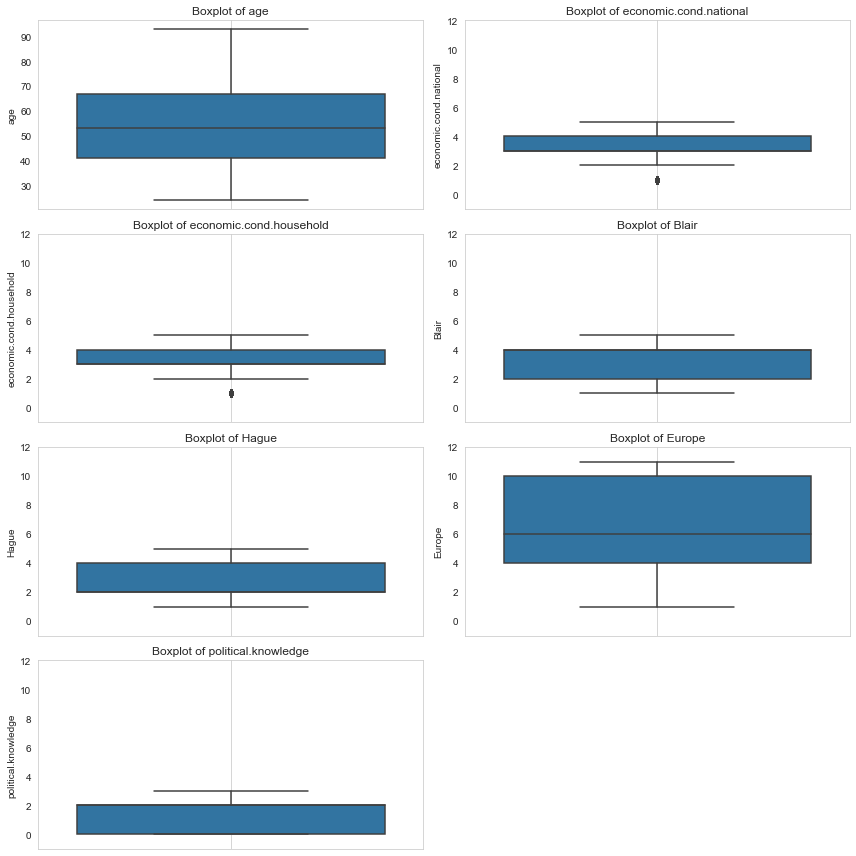

In [15]:

fig=plt.figure(figsize=(12,12))
for i in range(0,len(elec_df_num.columns)):
    ax=fig.add_subplot(4,2,i+1)
    g=sns.boxplot(y=elec_df_num[elec_df_num.columns[i]])
    plt.title('Boxplot of {}'.format(elec_df_num.columns[i]))
    if elec_df_num.columns[i] != 'age':
        g.set_ylim((-1,12))

    plt.grid()

plt.tight_layout()


The outliers in economic.cond.household and economic.cond.national need not be treated as they are ordinal data types.

In [16]:
def proportion_outlier1(column):
    Q1=elec_df_num[column].quantile(q=0.25)
    Q3=elec_df_num[column].quantile(q=0.75)
    IQR=stats.iqr(elec_df_num[column])   
    
    L_outlier=Q1-1.5*(Q3-Q1)
    U_outlier=Q3+1.5*(Q3-Q1)
    print('Lower outliers in ' +column+ ' is : ', L_outlier)
    print('Upper outliers in ' +column+ ' is : ', U_outlier)
    print('Number of outliers in '+column + ' upper : ', elec_df_num[elec_df_num[column]>U_outlier][column].count())
    print('Number of outliers in '+column + ' lower : ', elec_df_num[elec_df_num[column]<L_outlier][column].count())
    print('% of Outlier in '+column + ' upper: ',round(elec_df_num[elec_df_num[column]>U_outlier][column].count()*100/len(elec_df_num)), '%')
    print('% of Outlier in '+column + ' lower: ',round(elec_df_num[elec_df_num[column]<L_outlier][column].count()*100/len(elec_df_num)), '%')
    print('-----------------------------------------------------')


In [17]:
from scipy import stats

lstnumericcolumns1 = list(elec_df_num.columns.values)

for x in lstnumericcolumns1:
    proportion_outlier1(x)

Lower outliers in age is :  2.0
Upper outliers in age is :  106.0
Number of outliers in age upper :  0
Number of outliers in age lower :  0
% of Outlier in age upper:  0 %
% of Outlier in age lower:  0 %
-----------------------------------------------------
Lower outliers in economic.cond.national is :  1.5
Upper outliers in economic.cond.national is :  5.5
Number of outliers in economic.cond.national upper :  0
Number of outliers in economic.cond.national lower :  37
% of Outlier in economic.cond.national upper:  0 %
% of Outlier in economic.cond.national lower:  2 %
-----------------------------------------------------
Lower outliers in economic.cond.household is :  1.5
Upper outliers in economic.cond.household is :  5.5
Number of outliers in economic.cond.household upper :  0
Number of outliers in economic.cond.household lower :  65
% of Outlier in economic.cond.household upper:  0 %
% of Outlier in economic.cond.household lower:  4 %
------------------------------------------------

Value Count of vote
----------------------------------------------------------------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64

Description of vote
----------------------------------------------------------------------------
count       1517
unique         2
top       Labour
freq        1057
Name: vote, dtype: object

Countplot of vote
----------------------------------------------------------------------------


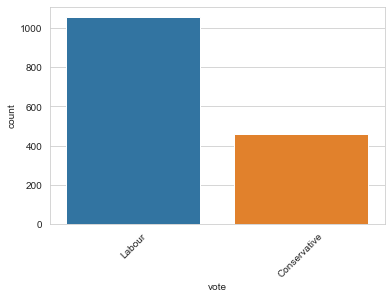

Value Count of economic.cond.national
----------------------------------------------------------------------------
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

Countplot of economic.cond.national
----------------------------------------------------------------------------


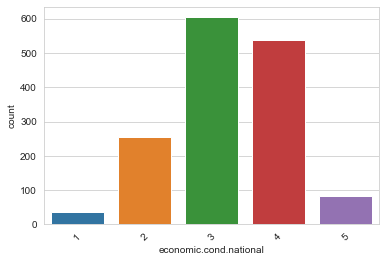

Value Count of economic.cond.household
----------------------------------------------------------------------------
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

Countplot of economic.cond.household
----------------------------------------------------------------------------


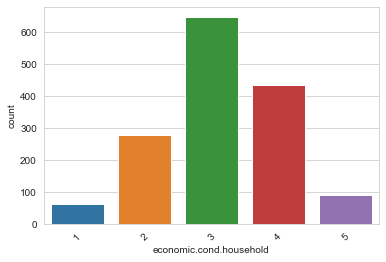

Value Count of Blair
----------------------------------------------------------------------------
4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

Countplot of Blair
----------------------------------------------------------------------------


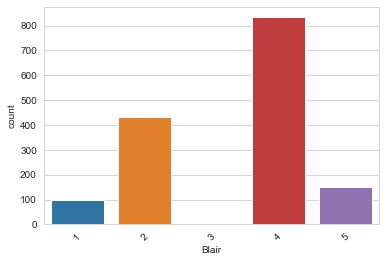

Value Count of Hague
----------------------------------------------------------------------------
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

Countplot of Hague
----------------------------------------------------------------------------


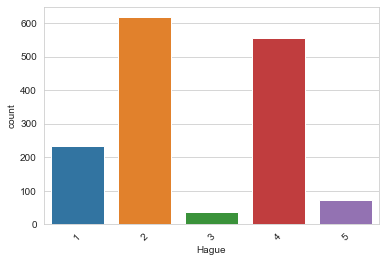

Value Count of Europe
----------------------------------------------------------------------------
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

Countplot of Europe
----------------------------------------------------------------------------


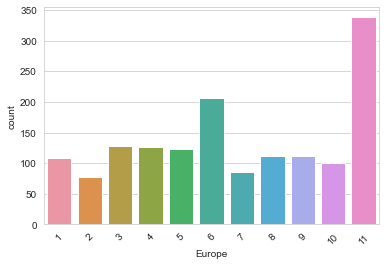

Value Count of political.knowledge
----------------------------------------------------------------------------
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

Countplot of political.knowledge
----------------------------------------------------------------------------


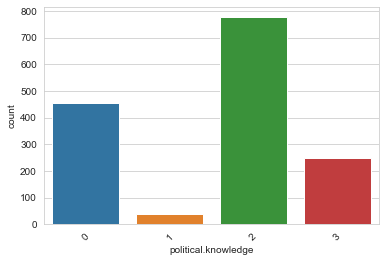

Value Count of gender
----------------------------------------------------------------------------
female    808
male      709
Name: gender, dtype: int64

Description of gender
----------------------------------------------------------------------------
count       1517
unique         2
top       female
freq         808
Name: gender, dtype: object

Countplot of gender
----------------------------------------------------------------------------


In [18]:
cols = ['vote','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']

elec_df_obj = elec_df[cols]



def univariateAnalysis_obj1(column):
    print("Value Count of " + column)
    print("----------------------------------------------------------------------------")
    print(elec_df_obj[column].value_counts(),end='\n\n')

    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(elec_df_obj[column].describe(),end='\n\n')
    
    
    plt.figure()
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=elec_df_obj[column]);
    plt.xticks(rotation=45)
    
    
    plt.show()
lstcolumns1 = list(cols)
for x in lstcolumns1:
    univariateAnalysis_obj1(x)


Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

Interquartile range (IQR) of is  26.0
Range of values:  69 

Distribution of age
----------------------------------------------------------------------------


Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

Interquartile range (IQR) of is  1.0
Range of values:  4 

Distribution of economic.cond.national
----------------------------------------------------------------------------


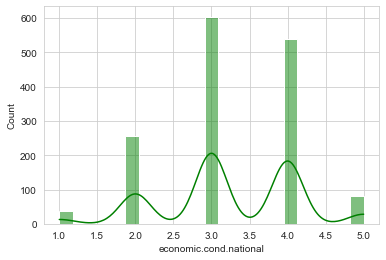

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

Interquartile range (IQR) of is  1.0
Range of values:  4 

Distribution of economic.cond.household
----------------------------------------------------------------------------


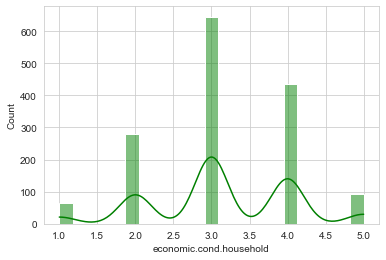

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

Interquartile range (IQR) of is  2.0
Range of values:  4 

Distribution of Blair
----------------------------------------------------------------------------


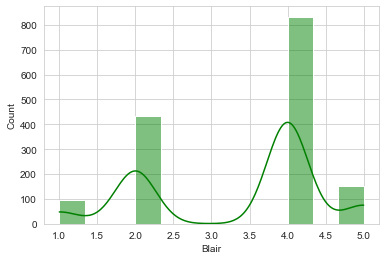

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

Interquartile range (IQR) of is  2.0
Range of values:  4 

Distribution of Hague
----------------------------------------------------------------------------


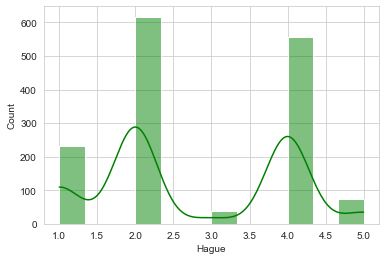

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

Interquartile range (IQR) of is  6.0
Range of values:  10 

Distribution of Europe
----------------------------------------------------------------------------


Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

Interquartile range (IQR) of is  2.0
Range of values:  3 

Distribution of political.knowledge
----------------------------------------------------------------------------


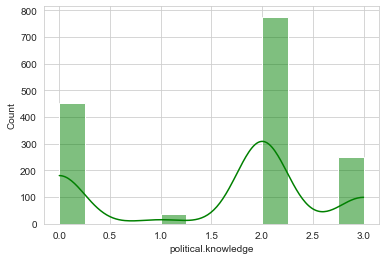

In [19]:
def univariateAnalysis_numeric1(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(elec_df_num[column].describe(),end='\n\n')
    print('Interquartile range (IQR) of is ', round(stats.iqr(elec_df_num[column]),3))
    print('Range of values: ', round(elec_df_num[column].max()-elec_df_num[column].min(),3),"\n")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(elec_df_num[column], kde=True, color='g');
    plt.show()

for x in lstnumericcolumns1:
    univariateAnalysis_numeric1(x)


### Bivariate Analysis with vote 


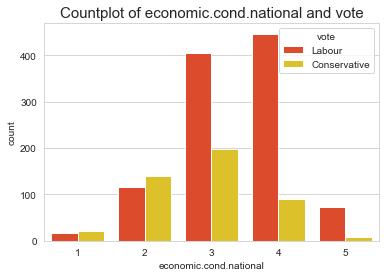

In [20]:
sns.countplot(x=elec_df["economic.cond.national"],hue=elec_df["vote"],palette=['#F9380E',"#F9D50E"]); 
plt.title('Countplot of economic.cond.national and vote',fontsize=15);


In [21]:
sns.countplot(x=elec_df["economic.cond.household"],hue=elec_df["vote"],palette=['#432371',"#FAAE7B"]); 
plt.title('Countplot of economic.cond.household and vote',fontsize=15);


In [22]:
sns.countplot(x=elec_df["Blair"],hue=elec_df["vote"]); 
plt.title('Countplot of Blair and vote',fontsize=15);


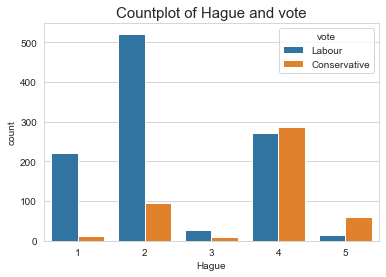

In [23]:
sns.countplot(x=elec_df["Hague"],hue=elec_df["vote"]); 
plt.title('Countplot of Hague and vote',fontsize=15);


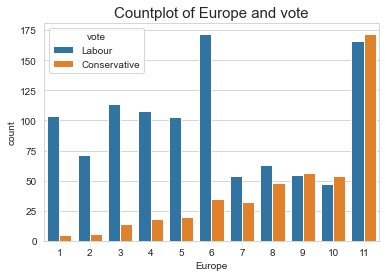

In [24]:
sns.countplot(x=elec_df["Europe"],hue=elec_df["vote"]); 
plt.title('Countplot of Europe and vote',fontsize=15);


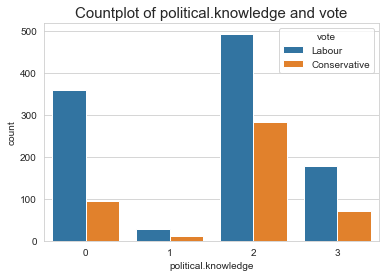

In [25]:
sns.countplot(x=elec_df["political.knowledge"],hue=elec_df["vote"]); 
plt.title('Countplot of political.knowledge and vote',fontsize=15);


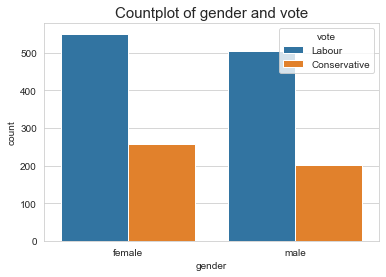

In [26]:
sns.countplot(x=elec_df["gender"],hue=elec_df["vote"]); 
plt.title('Countplot of gender and vote',fontsize=15);


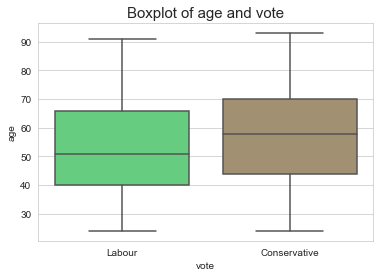

In [27]:
sns.boxplot(y='age', x='vote', data=elec_df, palette='terrain')
plt.title('Boxplot of age and vote',fontsize=15);


### Bivariate analysis with gender

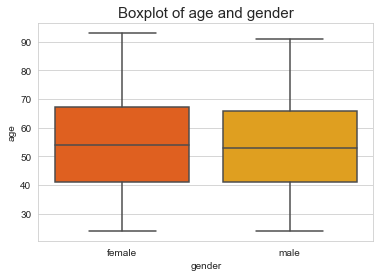

In [28]:
sns.boxplot(y='age', x='gender', data=elec_df, palette='autumn')
plt.title('Boxplot of age and gender',fontsize=15);


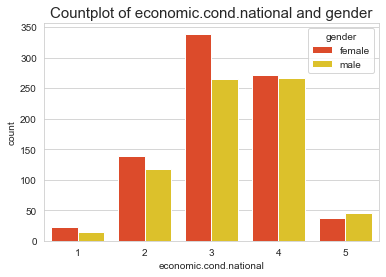

In [29]:
sns.countplot(x=elec_df["economic.cond.national"],hue=elec_df["gender"],palette=['#F9380E',"#F9D50E"]); 
plt.title('Countplot of economic.cond.national and gender',fontsize=15);


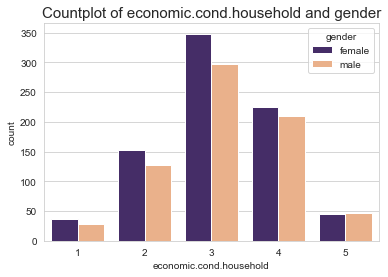

In [30]:
sns.countplot(x=elec_df["economic.cond.household"],hue=elec_df["gender"],palette=['#432371',"#FAAE7B"]); 
plt.title('Countplot of economic.cond.household and gender',fontsize=15);


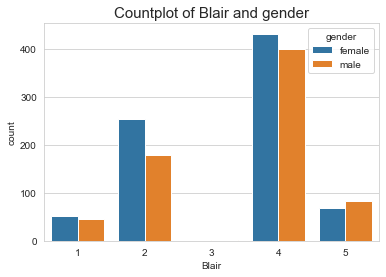

In [31]:
sns.countplot(x=elec_df["Blair"],hue=elec_df["gender"]); 
plt.title('Countplot of Blair and gender',fontsize=15);


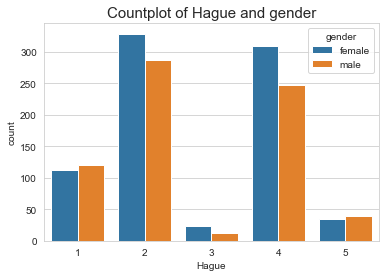

In [32]:
sns.countplot(x=elec_df["Hague"],hue=elec_df["gender"]); 
plt.title('Countplot of Hague and gender',fontsize=15);


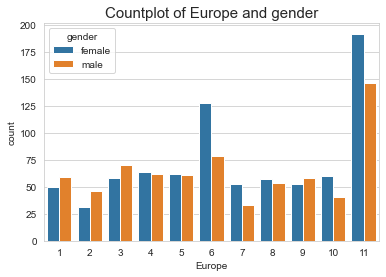

In [33]:
sns.countplot(x=elec_df["Europe"],hue=elec_df["gender"]); 
plt.title('Countplot of Europe and gender',fontsize=15);


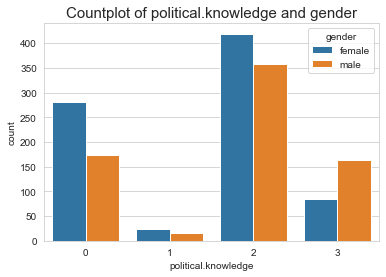

In [34]:
sns.countplot(x=elec_df["political.knowledge"],hue=elec_df["gender"]); 
plt.title('Countplot of political.knowledge and gender',fontsize=15);


                Pairplot


<Figure size 864x1080 with 0 Axes>

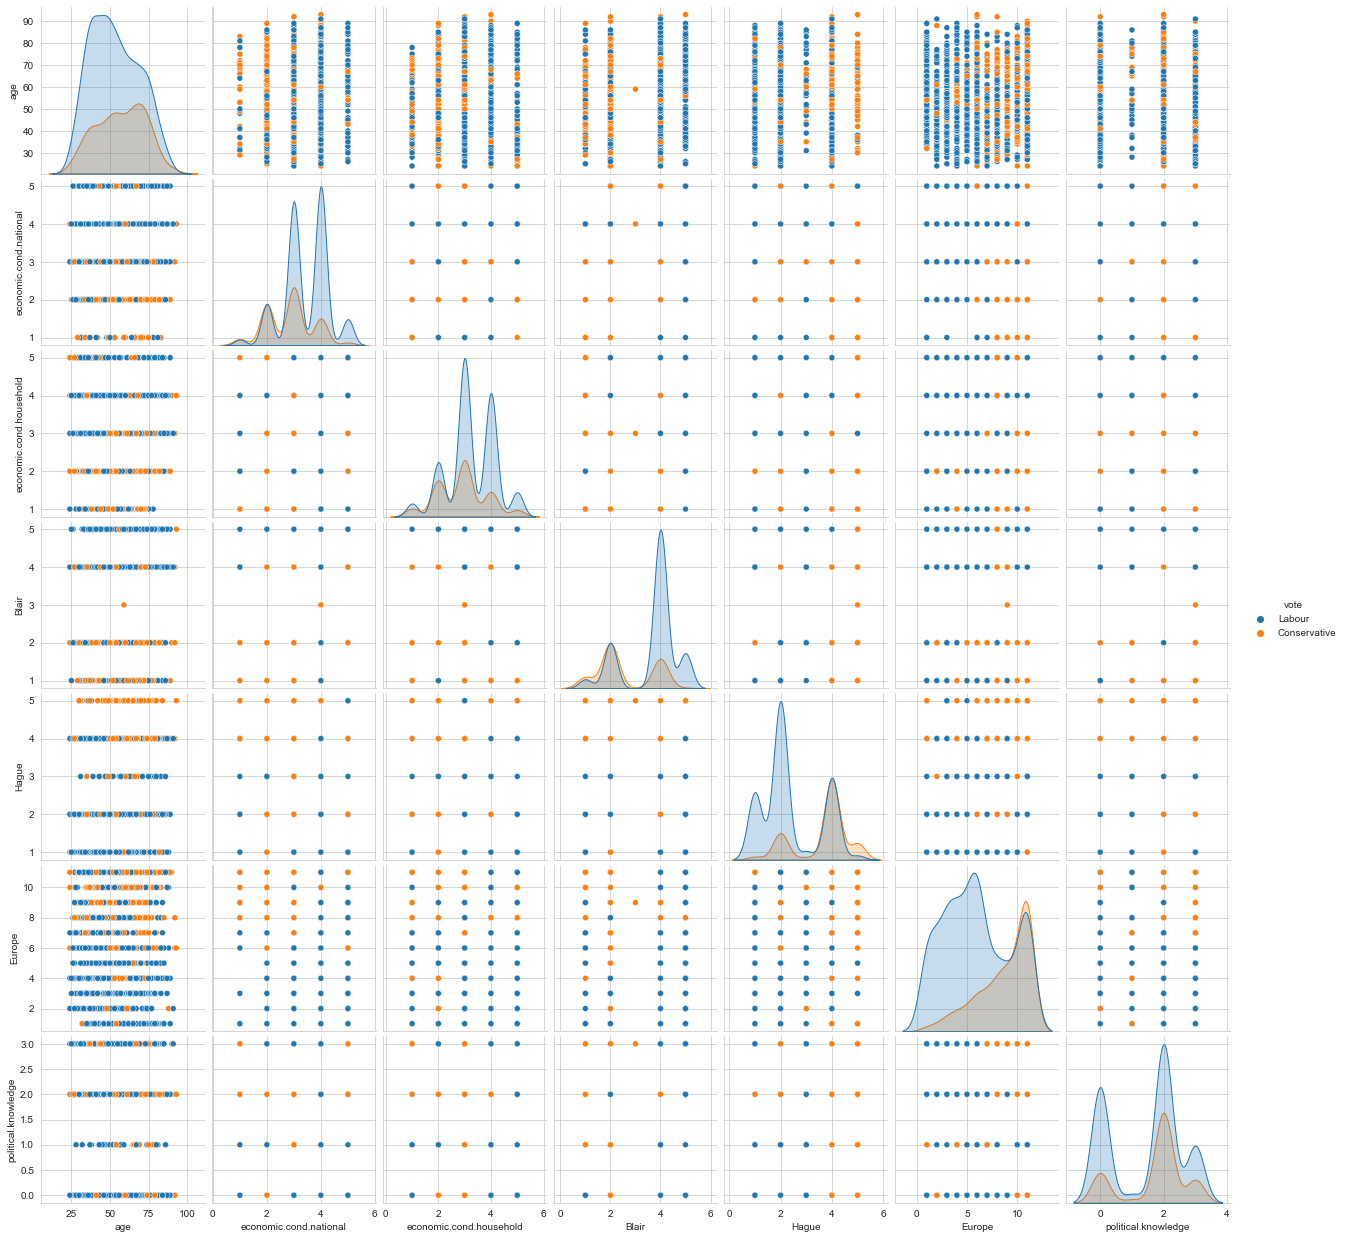

In [35]:
plt.figure(figsize=(12,15));
print('                Pairplot');
sns.pairplot(elec_df, corner=False, hue='vote');

plt.show();

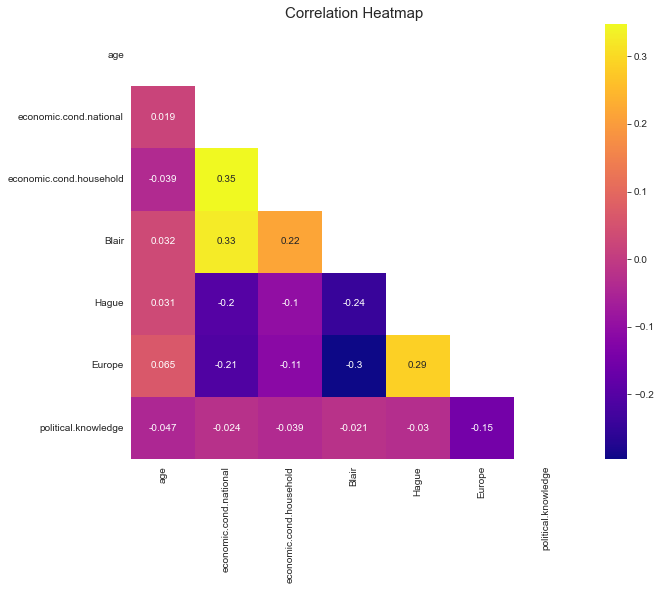

In [36]:
corr=elec_df_num.corr()
mask = np.triu(np.ones_like(corr)) 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,cmap='plasma',mask=mask);
plt.title('Correlation Heatmap',fontsize=15);


### Multivariate Analysis

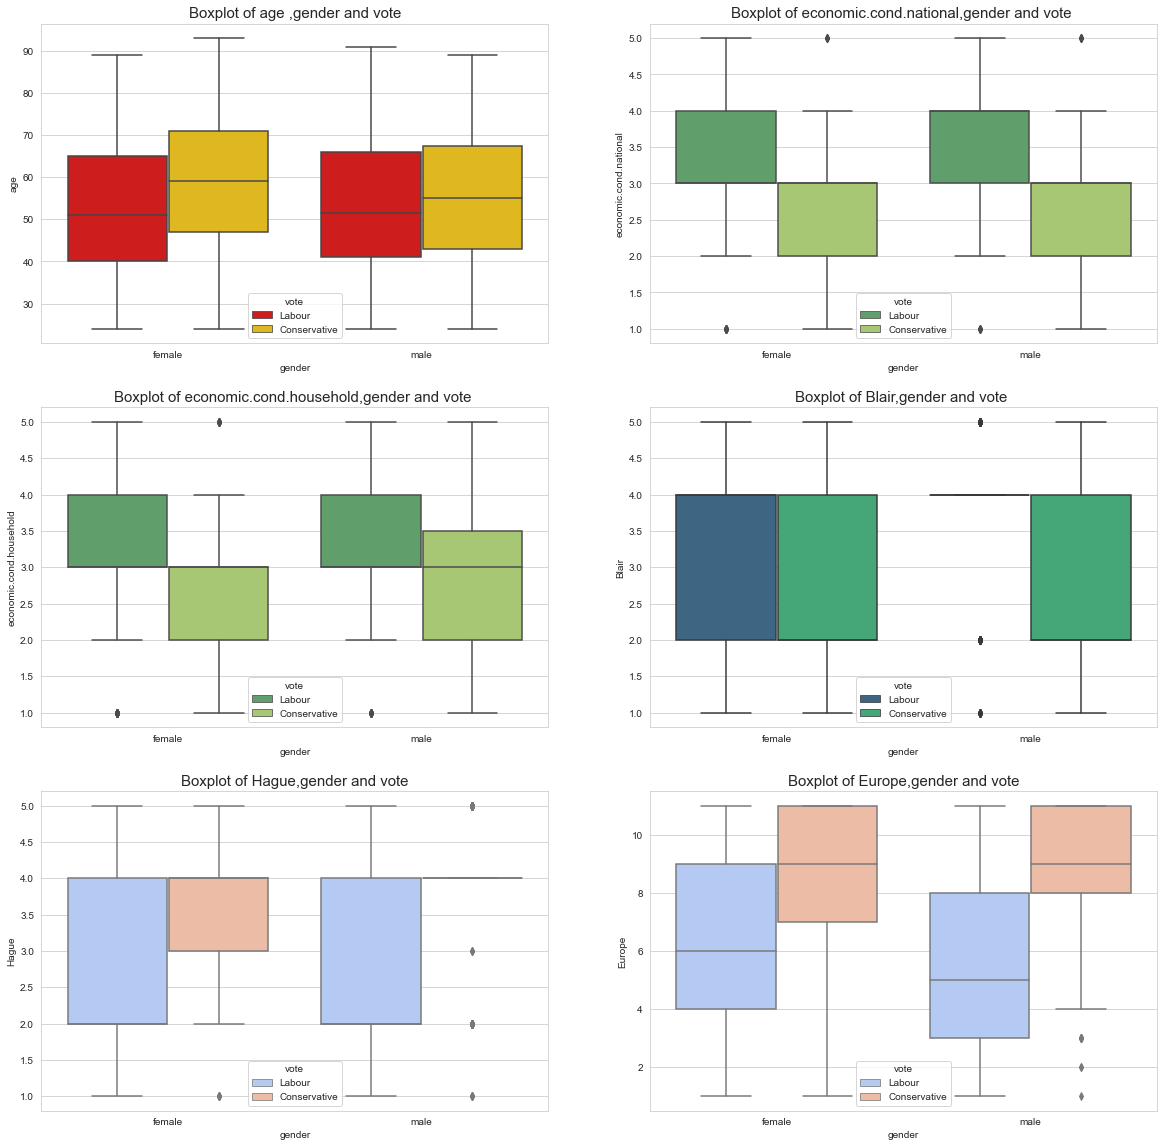

In [37]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(y='age', x='gender', hue='vote', data=elec_df, palette='hot')
plt.title('Boxplot of age ,gender and vote',fontsize=15)

plt.subplot(3,2,2)
sns.boxplot(y='economic.cond.national', x='gender',hue='vote', data=elec_df, palette='summer')
plt.title('Boxplot of economic.cond.national,gender and vote ',fontsize=15)

plt.subplot(3,2,3)
sns.boxplot(y='economic.cond.household', x='gender',hue='vote', data=elec_df, palette='summer')
plt.title('Boxplot of economic.cond.household,gender and vote ',fontsize=15)

plt.subplot(3,2,4)
sns.boxplot(y='Blair', x='gender',hue='vote', data=elec_df, palette='viridis')
plt.title('Boxplot of Blair,gender and vote ',fontsize=15)

plt.subplot(3,2,5)
sns.boxplot(y='Hague', x='gender',hue='vote', data=elec_df, palette='coolwarm')
plt.title('Boxplot of Hague,gender and vote',fontsize=15);

plt.subplot(3,2,6)
sns.boxplot(y='Europe', x='gender',hue='vote', data=elec_df, palette='coolwarm')
plt.title('Boxplot of Europe,gender and vote',fontsize=15);



## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 



In [38]:
elec_df =pd.get_dummies(elec_df, columns=['gender'],drop_first=True)
elec_df.loc[20:30,:]

vote  age  economic.cond.national  economic.cond.household  Blair  \
20        Labour   38                       3                        3      4   
21        Labour   53                       2                        1      2   
22        Labour   59                       3                        3      4   
23  Conservative   44                       2                        4      4   
24  Conservative   60                       3                        2      4   
25        Labour   51                       3                        3      4   
26  Conservative   56                       2                        2      2   
27        Labour   51                       3                        2      4   
28        Labour   44                       3                        3      4   
29        Labour   61                       4                        3      5   
30        Labour   55                       3                        3      4   

    Hague  Europe  political.knowledge  gender_male  
20      4       7                    0            1  
21      4       5                    2            1  
22      2       1                    2            1  
23      4       9                    2            1  
24      4       2                    2            0  
25      3       6                    0            0  
26      4       9                    2            0  
27      2       2                    2            0  
28      2       1                    2            1  
29      1       1                    2            1  
30      4       6                    2            0

Scaling not necessary for lda and logistic regression but required for KNN,RF which use distance based calculation.

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.


In [39]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
elec_df['vote'] = LE.fit_transform(elec_df['vote'])
#elec_df.head(10)

In [40]:
elec_df.loc[20:30,:]

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
20     1   38                       3                        3      4      4   
21     1   53                       2                        1      2      4   
22     1   59                       3                        3      4      2   
23     0   44                       2                        4      4      4   
24     0   60                       3                        2      4      4   
25     1   51                       3                        3      4      3   
26     0   56                       2                        2      2      4   
27     1   51                       3                        2      4      2   
28     1   44                       3                        3      4      2   
29     1   61                       4                        3      5      1   
30     1   55                       3                        3      4      4   

    Europe  political.knowledge  gender_male  
20       7                    0            1  
21       5                    2            1  
22       1                    2            1  
23       9                    2            1  
24       2                    2            0  
25       6                    0            0  
26       9                    2            0  
27       2                    2            0  
28       1                    2            1  
29       1                    2            1  
30       6                    2            0

Labour is encoded as 1 and Conservative as 0

In [41]:
X=elec_df.drop('vote',axis=1)
y=elec_df['vote']
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [42]:
X_train.shape

(1061, 8)

In [43]:
train_labels.value_counts()


1    754
0    307
Name: vote, dtype: int64

The class is heavily imbalanced hence SMOTE is applied for Oversampling

In [44]:
sm = SMOTE(random_state=1)
X_train_res, train_labels_res = sm.fit_resample(X_train, train_labels)


In [45]:
train_labels_res.value_counts()


0    754
1    754
Name: vote, dtype: int64

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)


### Model 1 - Basic Logistic Regression

In [46]:
log_model1 = LogisticRegression()
log_model1.fit(X_train, train_labels)


LogisticRegression()

In [47]:
log_pred_train1 = log_model1.predict(X_train)
print(classification_report(train_labels ,log_pred_train1))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [48]:
log_pred_test1 = log_model1.predict(X_test)
print(classification_report(test_labels ,log_pred_test1))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [49]:
ytest_log_predict_prob1=log_model1.predict_proba(X_test)
pd.DataFrame(ytest_log_predict_prob1).head()

0         1
0  0.425113  0.574887
1  0.145808  0.854192
2  0.005656  0.994344
3  0.846202  0.153798
4  0.061517  0.938483

### Model 2 - Basic Linear Discriminant Analysis (LDA)

In [50]:
lda_model1 = LinearDiscriminantAnalysis()
lda_model1.fit(X_train,train_labels)


LinearDiscriminantAnalysis()

In [51]:
lda_pred_train1 = lda_model1.predict(X_train)
print(classification_report(train_labels ,lda_pred_train1))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [52]:
lda_pred_test1 = lda_model1.predict(X_test)
print(classification_report(test_labels ,lda_pred_test1))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [53]:
ytest_lda_predict_prob1=lda_model1.predict_proba(X_test)
pd.DataFrame(ytest_lda_predict_prob1).head()

0         1
0  0.462093  0.537907
1  0.133955  0.866045
2  0.006414  0.993586
3  0.861210  0.138790
4  0.056545  0.943455

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. 


### Model 3 - Basic KNN Model

In [54]:
from scipy.stats import zscore

X_train_Scaled  = X_train.apply(zscore)  
X_test_Scaled  = X_test.apply(zscore)  
KNN1 = KNeighborsClassifier()
KNN1.fit(X_train_Scaled, train_labels)


KNeighborsClassifier()

In [55]:
KNN1_pred_train1 = KNN1.predict(X_train_Scaled)
print(classification_report(train_labels ,KNN1_pred_train1))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [56]:
KNN1_pred_test1 = KNN1.predict(X_test_Scaled)
print(classification_report(test_labels ,KNN1_pred_test1))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [57]:
ytest_knn_predict_prob1=KNN1.predict_proba(X_test_Scaled)
pd.DataFrame(ytest_knn_predict_prob1).head()

0    1
0  0.8  0.2
1  0.2  0.8
2  0.0  1.0
3  0.8  0.2
4  0.0  1.0

### Model 4- Basic Naïve Bayes Model

In [58]:
GNB1 = GaussianNB()
GNB1.fit(X_train, train_labels)

GaussianNB()

In [59]:
GNB_pred_train1 = GNB1.predict(X_train)
print(classification_report(train_labels ,GNB_pred_train1))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [60]:
GNB_pred_test1 = GNB1.predict(X_test)
print(classification_report(test_labels ,GNB_pred_test1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [61]:
ytest_GNB_predict_prob=GNB1.predict_proba(X_test)
pd.DataFrame(ytest_GNB_predict_prob).head()

0         1
0  0.536792  0.463208
1  0.120285  0.879715
2  0.000332  0.999668
3  0.945240  0.054760
4  0.039267  0.960733

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Model 5 - GridSearchCV Logistic Regression

In [62]:
grid1={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','saga','newton-cg'],
       'C':[0.001, 0.01, 0.1, 1],
      'tol':[0.0001,0.00001]}

In [63]:
log_model2 = LogisticRegression(max_iter=10000,random_state=1)
grid_search1 = GridSearchCV(estimator = log_model2, param_grid = grid1, cv = 3,n_jobs=-1,scoring='f1')
grid_search1.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [64]:
best_model1 = grid_search1.best_estimator_

In [65]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', random_state=1,
                   solver='saga', tol=1e-05)


In [66]:
log_pred_train2 = best_model1.predict(X_train)
print(classification_report(train_labels ,log_pred_train2))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [67]:
log_pred_test2 = best_model1.predict(X_test)
print(classification_report(test_labels ,log_pred_test2))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [68]:
ytest_log_predict_prob2=best_model1.predict_proba(X_test)
pd.DataFrame(ytest_log_predict_prob2).head()

0         1
0  0.398320  0.601680
1  0.157321  0.842679
2  0.012226  0.987774
3  0.786783  0.213217
4  0.104447  0.895553

### Model 6 - SMOTE Logistic Regression

In [69]:
log_SM_model = LogisticRegression()
log_SM_model.fit(X_train_res, train_labels_res)

LogisticRegression()

In [70]:
log_SM_pred_train = log_SM_model.predict(X_train_res)
print(classification_report(train_labels_res ,log_SM_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [71]:
log_SM_pred_test = log_SM_model.predict(X_test)
print(classification_report(test_labels ,log_SM_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       153
           1       0.89      0.80      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.81      0.80      0.80       456



### Model 7 - GridSearchCV Linear Discriminant Analysis (LDA)

In [72]:
grid2={'solver':['svd','lsqr','eigen']}
lda_model2 = LinearDiscriminantAnalysis()
grid_search2 = GridSearchCV(estimator = lda_model2, param_grid = grid2, cv = 3,n_jobs=-1,scoring='f1')

In [73]:
grid_search2.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='f1')

In [74]:
best_model2 = grid_search2.best_estimator_

In [75]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [76]:
lda_pred_train2 = best_model2.predict(X_train)
print(classification_report(train_labels ,lda_pred_train2))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [77]:
lda_pred_test2 = best_model2.predict(X_test)
print(classification_report(test_labels ,lda_pred_test2))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [78]:
ytest_lda_predict_prob2=best_model2.predict_proba(X_test)
pd.DataFrame(ytest_lda_predict_prob2).head()

0         1
0  0.462093  0.537907
1  0.133955  0.866045
2  0.006414  0.993586
3  0.861210  0.138790
4  0.056545  0.943455

### Model 8 - SMOTE LDA

In [79]:
lda_SM_model = LinearDiscriminantAnalysis()
lda_SM_model.fit(X_train_res, train_labels_res)

LinearDiscriminantAnalysis()

In [80]:
lda_SM_pred_train = lda_SM_model.predict(X_train_res)
print(classification_report(train_labels_res ,lda_SM_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [81]:
lda_SM_pred_test = lda_SM_model.predict(X_test)
print(classification_report(test_labels ,lda_SM_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.83      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.83      0.81      0.81       456



### Model 9 - GridSearchCV KNN Model

In [82]:
grid3={'n_neighbors':[3,5,7,9,11,13,15,17,19,21],
       'weights':['uniform','distance'],
       'metric':['chebyshev','euclidean','manhattan']}
KNN2 = KNeighborsClassifier()
grid_search3 = GridSearchCV(estimator = KNN2, param_grid = grid3, cv = 3,n_jobs=-1,scoring='f1')

In [83]:
grid_search3.fit(X_train_Scaled, train_labels)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['chebyshev', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [84]:
best_model3 = grid_search3.best_estimator_

In [85]:
print(grid_search3.best_params_,'\n')
print(grid_search3.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'} 

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')


In [86]:
knn_pred_train2 = best_model3.predict(X_train_Scaled)
print(classification_report(train_labels ,knn_pred_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [87]:
knn_pred_test2 = best_model3.predict(X_test_Scaled)
print(classification_report(test_labels ,knn_pred_test2))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [88]:
ytest_knn_predict_prob2=best_model3.predict_proba(X_test_Scaled)
pd.DataFrame(ytest_knn_predict_prob2).head()

0         1
0  0.689289  0.310711
1  0.060431  0.939569
2  0.000000  1.000000
3  0.798778  0.201222
4  0.096060  0.903940

### Model 10 - SMOTE KNN

In [89]:
X_train_Scaled_res  = X_train_res.apply(zscore)  

knn_SM_model = KNeighborsClassifier()
knn_SM_model.fit(X_train_Scaled_res, train_labels_res)

KNeighborsClassifier()

In [90]:
knn_SM_pred_train = knn_SM_model.predict(X_train_Scaled_res)
print(classification_report(train_labels_res ,knn_SM_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       754
           1       0.93      0.83      0.88       754

    accuracy                           0.88      1508
   macro avg       0.89      0.88      0.88      1508
weighted avg       0.89      0.88      0.88      1508



In [91]:
knn_SM_pred_test = knn_SM_model.predict(X_test_Scaled)
print(classification_report(test_labels ,knn_SM_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       153
           1       0.89      0.77      0.83       303

    accuracy                           0.79       456
   macro avg       0.77      0.79      0.77       456
weighted avg       0.81      0.79      0.79       456



### Model 11- GridSearchCV Naïve Bayes Model

In [92]:
grid4={'var_smoothing':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

In [93]:
GNB2 = GaussianNB()
grid_search4 = GridSearchCV(estimator = GNB2, param_grid = grid4, cv = 3,n_jobs=-1,scoring='f1')

In [94]:
grid_search4.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001]},
             scoring='f1')

In [95]:
best_model4 = grid_search4.best_estimator_

In [96]:
print(grid_search4.best_params_,'\n')
print(grid_search4.best_estimator_)

{'var_smoothing': 0.0001} 

GaussianNB(var_smoothing=0.0001)


In [97]:
GNB_pred_train2 = best_model4.predict(X_train)
print(classification_report(train_labels ,GNB_pred_train2))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [98]:
GNB_pred_test2 = best_model4.predict(X_test)
print(classification_report(test_labels ,GNB_pred_test2))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



### Model 12 - SMOTE Naïve Bayes Model

In [99]:
GNB_SM_model = GaussianNB()
GNB_SM_model.fit(X_train_res, train_labels_res)

GaussianNB()

In [100]:
GNB_SM_pred_train = GNB_SM_model.predict(X_train_res)
print(classification_report(train_labels_res ,GNB_SM_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       754
           1       0.84      0.84      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [101]:
GNB_SM_pred_test = GNB_SM_model.predict(X_test)
print(classification_report(test_labels ,GNB_SM_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       153
           1       0.88      0.82      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



### Model 13 - Basic Bagging Classifier Random Forest


In [102]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

RF = RandomForestClassifier()
Bagging_model_RF1=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model_RF1.fit(X_train, train_labels)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [103]:
Bagging_RF_pred_train1 = Bagging_model_RF1.predict(X_train)
print(classification_report(train_labels ,Bagging_RF_pred_train1))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [104]:
Bagging_RF_pred_test1 = Bagging_model_RF1.predict(X_test)
print(classification_report(test_labels ,Bagging_RF_pred_test1))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [105]:
feature_importances_bagRF = np.mean([
    tree.feature_importances_ for tree in Bagging_model_RF1.estimators_
], axis=0)


In [106]:
print (pd.DataFrame(feature_importances_bagRF, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


                         Feature_Imp
age                         0.201741
Europe                      0.193012
Hague                       0.176092
Blair                       0.138551
economic.cond.national      0.099165
economic.cond.household     0.080253
political.knowledge         0.076198
gender_male                 0.034988


### Model 14 - GridSearchCV Bagging Classifier Random Forest

In [107]:
grid5 = {'base_estimator__max_depth': [8, 10, 12],
         'max_features': [2,3],
    'base_estimator__min_samples_split': [20, 35, 50]}
#X_train row -1061, min sample split is 2%-3% of training set.
#Values of max-depth is suggested to be taken from 8-15 to avoid overfitting and underfitting. 
#Value of Max feature is taken as square root of number of independent variable to half of the number of independent variables

In [108]:
RF = RandomForestClassifier()
Bagging_model_RF2=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
grid_search5 = GridSearchCV(estimator = Bagging_model_RF2, param_grid = grid5, cv = 3,n_jobs=-1,scoring='f1')

In [109]:
grid_search5

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         n_estimators=100, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [8, 10, 12],
                         'base_estimator__min_samples_split': [20, 35, 50],
                         'max_features': [2, 3]},
             scoring='f1')

In [110]:
grid_search5.fit(X_train, train_labels)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         n_estimators=100, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [8, 10, 12],
                         'base_estimator__min_samples_split': [20, 35, 50],
                         'max_features': [2, 3]},
             scoring='f1')

In [111]:
best_model5 = grid_search5.best_estimator_

In [112]:
print(grid_search5.best_params_,'\n')
print(grid_search5.best_estimator_)

{'base_estimator__max_depth': 8, 'base_estimator__min_samples_split': 35, 'max_features': 3} 

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        min_samples_split=35),
                  max_features=3, n_estimators=100, random_state=1)


In [113]:
Bagging_RF_pred_train2 = best_model5.predict(X_train)
print(classification_report(train_labels ,Bagging_RF_pred_train2))

              precision    recall  f1-score   support

           0       0.85      0.39      0.54       307
           1       0.80      0.97      0.88       754

    accuracy                           0.80      1061
   macro avg       0.82      0.68      0.71      1061
weighted avg       0.81      0.80      0.78      1061



In [114]:
Bagging_RF_pred_test2 = best_model5.predict(X_test)
print(classification_report(test_labels ,Bagging_RF_pred_test2))

              precision    recall  f1-score   support

           0       0.86      0.40      0.54       153
           1       0.76      0.97      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.68      0.70       456
weighted avg       0.79      0.78      0.75       456



### Model 15 - SMOTE Bagging Classifier Random Forest


In [115]:
RF = RandomForestClassifier()
Bagging_SM_model_RF=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_SM_model_RF.fit(X_train_res, train_labels_res)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [116]:
Bagging_SM_RF_pred_train = Bagging_SM_model_RF.predict(X_train_res)
print(classification_report(train_labels_res ,Bagging_SM_RF_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       754
           1       0.98      0.97      0.97       754

    accuracy                           0.97      1508
   macro avg       0.97      0.97      0.97      1508
weighted avg       0.97      0.97      0.97      1508



In [117]:
Bagging_SM_RF_pred_test = Bagging_SM_model_RF.predict(X_test)
print(classification_report(test_labels ,Bagging_SM_RF_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       153
           1       0.87      0.86      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [118]:
feature_importances_bagRF_SM = np.mean([
    tree.feature_importances_ for tree in Bagging_SM_model_RF.estimators_
], axis=0)


In [119]:
print (pd.DataFrame(feature_importances_bagRF_SM, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


                         Feature_Imp
Blair                       0.197702
Hague                       0.174460
Europe                      0.167678
age                         0.167045
economic.cond.national      0.123832
economic.cond.household     0.071175
political.knowledge         0.066786
gender_male                 0.031323


### Model 16 - Basic Gradient Boosting


In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl1 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl1.fit(X_train, train_labels)


GradientBoostingClassifier(n_estimators=50, random_state=1)

In [121]:
gbcl_pred_train1 = gbcl1.predict(X_train)
print(classification_report(train_labels, gbcl_pred_train1))


              precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [122]:
gbcl_pred_test1 = gbcl1.predict(X_test)
print(classification_report(test_labels, gbcl_pred_test1))


              precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [123]:
print (pd.DataFrame(gbcl1.feature_importances_, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


                         Feature_Imp
Hague                       0.368407
Blair                       0.194182
Europe                      0.170843
political.knowledge         0.088971
economic.cond.national      0.077137
age                         0.072937
economic.cond.household     0.026135
gender_male                 0.001389


### Model 17 - GridSearchCV Gradient Boosting


In [124]:
grid6 = {"learning_rate": [0.01, 0.1, 0.15],
         "criterion":['friedman_mse', 'squared_error'],
        "n_estimators":[50,100,150,200]}


In [125]:
gbcl2 = GradientBoostingClassifier(random_state=1)
grid_search6 = GridSearchCV(estimator = gbcl2, param_grid = grid6, cv = 3,n_jobs=-1,scoring='f1')

In [126]:
grid_search6.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.15],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [127]:
best_model6 = grid_search6.best_estimator_

In [128]:
print(grid_search6.best_params_,'\n')
print(grid_search6.best_estimator_)

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 200} 

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, random_state=1)


In [129]:
gbcl_pred_train2 = best_model6.predict(X_train)
print(classification_report(train_labels ,gbcl_pred_train2))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       307
           1       0.87      0.94      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.86      0.86      0.85      1061



In [130]:
gbcl_pred_test2 = best_model6.predict(X_test)
print(classification_report(test_labels ,gbcl_pred_test2))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       153
           1       0.83      0.94      0.88       303

    accuracy                           0.84       456
   macro avg       0.84      0.78      0.80       456
weighted avg       0.84      0.84      0.83       456



In [131]:
print (pd.DataFrame(best_model6.feature_importances_, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


                         Feature_Imp
Hague                       0.397301
Blair                       0.207496
Europe                      0.179551
political.knowledge         0.085718
economic.cond.national      0.073024
age                         0.045363
economic.cond.household     0.011548
gender_male                 0.000000


### Model 18 - SMOTE Gradient Boosting


In [132]:
gbcl_SM_model = GradientBoostingClassifier(random_state=1)
gbcl_SM_model.fit(X_train_res, train_labels_res)


GradientBoostingClassifier(random_state=1)

In [133]:
gbcl_SM_pred_train = gbcl_SM_model.predict(X_train_res)
print(classification_report(train_labels_res, gbcl_SM_pred_train))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       754
           1       0.93      0.88      0.90       754

    accuracy                           0.91      1508
   macro avg       0.91      0.91      0.91      1508
weighted avg       0.91      0.91      0.91      1508



In [134]:
gbcl_SM_pred_test = gbcl_SM_model.predict(X_test)
print(classification_report(test_labels, gbcl_SM_pred_test))


              precision    recall  f1-score   support

           0       0.72      0.79      0.75       153
           1       0.89      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.82      0.83       456



In [135]:
print (pd.DataFrame(gbcl_SM_model.feature_importances_, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


                         Feature_Imp
Blair                       0.410982
Hague                       0.221016
Europe                      0.115826
economic.cond.national      0.112698
age                         0.059080
political.knowledge         0.054870
economic.cond.household     0.019101
gender_male                 0.006426


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.


### Model 1 - Basic Logistic Regression

### Classification Report -Train Data

In [50]:
print(classification_report(train_labels,log_pred_train1))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [51]:
log_train_classifRepo1 = classification_report(train_labels,log_pred_train1,output_dict=True)
log_train1 = pd.DataFrame(log_train_classifRepo1).transpose()

log_train_precision1_conserv = round(log_train1.loc["0"][0],2)
log_train_recall1_conserv = round(log_train1.loc["0"][1],2)
log_train_f1_1_conserv = round(log_train1.loc["0"][2],2)

log_train_precision1_labour = round(log_train1.loc["1"][0],2)
log_train_recall1_labour = round(log_train1.loc["1"][1],2)
log_train_f1_1_labour = round(log_train1.loc["1"][2],2)

print ('Logistic Regression Labour Train precision :',log_train_precision1_labour)
print ('Logistic Regression Labour Train recall : ',log_train_recall1_labour)
print ('Logistic Regression Labour Train f1 : ',log_train_f1_1_labour)

print ('Logistic Regression Conservative Train precision :',log_train_precision1_conserv)
print ('Logistic Regression Conservative Train recall : ',log_train_recall1_conserv)
print ('Logistic Regression Conservative Train f1 : ',log_train_f1_1_conserv)



Logistic Regression Labour Train precision : 0.86
Logistic Regression Labour Train recall :  0.91
Logistic Regression Labour Train f1 :  0.89
Logistic Regression Conservative Train precision : 0.75
Logistic Regression Conservative Train recall :  0.65
Logistic Regression Conservative Train f1 :  0.69


### Classification Report -Test Data

In [52]:
print(classification_report(test_labels,log_pred_test1))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [53]:
log_test_classifRepo1 = classification_report(test_labels,log_pred_test1,output_dict=True)
log_test1 = pd.DataFrame(log_test_classifRepo1).transpose()

log_test_precision1_conserv = round(log_test1.loc["0"][0],2)
log_test_recall1_conserv = round(log_test1.loc["0"][1],2)
log_test_f1_1_conserv = round(log_test1.loc["0"][2],2)


log_test_precision1_labour = round(log_test1.loc["1"][0],2)
log_test_recall1_labour = round(log_test1.loc["1"][1],2)
log_test_f1_1_labour = round(log_test1.loc["1"][2],2)

print ('Logistic Regression Labour Test precision :',log_test_precision1_labour)
print ('Logistic Regression Labour Test recall : ',log_test_recall1_labour)
print ('Logistic Regression Labour Test f1 : ',log_test_f1_1_labour)

print ('Logistic Regression Conservative Test precision :',log_test_precision1_conserv)
print ('Logistic Regression Conservative Test recall : ',log_test_recall1_conserv)
print ('Logistic Regression Conservative Test f1 : ',log_test_f1_1_conserv)



Logistic Regression Labour Test precision : 0.86
Logistic Regression Labour Test recall :  0.88
Logistic Regression Labour Test f1 :  0.87
Logistic Regression Conservative Test precision : 0.75
Logistic Regression Conservative Test recall :  0.72
Logistic Regression Conservative Test f1 :  0.73


### Confusion Matrix - Train Data

In [54]:
sns.heatmap(confusion_matrix(train_labels, log_pred_train1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

In [55]:
sns.heatmap(confusion_matrix(test_labels, log_pred_test1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [56]:
log_train_accu1 = log_model1.score(X_train,train_labels)
print("Accuracy score of Logistic Regression Trained data is ",round(log_train_accu1,2))

Accuracy score of Logistic Regression Trained data is  0.84


In [57]:
log_test_accu1 = log_model1.score(X_test,test_labels)
print("Accuracy score of Logistic Regression Tested data is ",round(log_test_accu1,2))

Accuracy score of Logistic Regression Tested data is  0.82


### ROC Curve and AUC Score - Train

AUC Score for logReg train data: 0.890


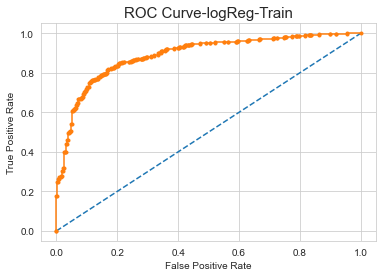

In [58]:
probs = log_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc1 = roc_auc_score(train_labels, probs)
print('AUC Score for logReg train data: %.3f' % log_train_auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr1, log_train_tpr1, log_train_thresholds1 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr1, log_train_tpr1, marker='.')
plt.title('ROC Curve-logReg-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [59]:
log_train_tpr1

array([0.        , 0.00132626, 0.17904509, 0.17904509, 0.24933687,
       0.24933687, 0.26392573, 0.26392573, 0.27055703, 0.27055703,
       0.27718833, 0.27718833, 0.30238727, 0.30238727, 0.31962865,
       0.31962865, 0.39787798, 0.39787798, 0.4005305 , 0.4005305 ,
       0.43766578, 0.43766578, 0.45755968, 0.45755968, 0.49469496,
       0.49469496, 0.50132626, 0.50132626, 0.50530504, 0.50530504,
       0.53846154, 0.53846154, 0.60477454, 0.60477454, 0.61405836,
       0.61405836, 0.61671088, 0.61671088, 0.62201592, 0.62201592,
       0.63793103, 0.63793103, 0.64854111, 0.64854111, 0.66843501,
       0.66843501, 0.66976127, 0.66976127, 0.67241379, 0.67241379,
       0.67771883, 0.67771883, 0.69230769, 0.69230769, 0.70424403,
       0.70424403, 0.70689655, 0.70689655, 0.72015915, 0.72015915,
       0.72811671, 0.72811671, 0.74933687, 0.74933687, 0.75331565,
       0.75331565, 0.75729443, 0.75729443, 0.76127321, 0.76127321,
       0.76259947, 0.76259947, 0.76392573, 0.76392573, 0.76790

### ROC Curve and AUC Score - Test

In [145]:
probs = log_model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc1 = roc_auc_score(test_labels, probs)
print('AUC Score for logReg test data: %.3f' % log_test_auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr1, log_test_tpr1, log_test_thresholds1 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr1, log_test_tpr1, marker='.')
plt.title('ROC Curve-logReg-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for logReg test data: 0.879


### Model 5 - GridSearchCV Logistic Regression

### Classification Report -Train Data

In [146]:
print(classification_report(train_labels,log_pred_train2))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [147]:
log_train_classifRepo2 = classification_report(train_labels,log_pred_train2,output_dict=True)
log_train2 = pd.DataFrame(log_train_classifRepo2).transpose()

log_train_precision2_labour = round(log_train2.loc["1"][0],2)
log_train_recall2_labour = round(log_train2.loc["1"][1],2)
log_train_f1_2_labour = round(log_train2.loc["1"][2],2)


log_train_precision2_conserv = round(log_train2.loc["0"][0],2)
log_train_recall2_conserv = round(log_train2.loc["0"][1],2)
log_train_f1_2_conserv = round(log_train2.loc["0"][2],2)


print ('Logistic Regression GridSearchCV Conservative Train precision :',log_train_precision2_conserv)
print ('Logistic Regression GridSearchCV Conservative Train recall : ',log_train_recall2_conserv)
print ('Logistic Regression GridSearchCV Conservative Train f1 : ',log_train_f1_2_conserv)

print ('Logistic Regression GridSearchCV Labour Train precision :',log_train_precision2_labour)
print ('Logistic Regression GridSearchCV Labour Train recall : ',log_train_recall2_labour)
print ('Logistic Regression GridSearchCV Labour Train f1 : ',log_train_f1_2_labour)



Logistic Regression GridSearchCV Conservative Train precision : 0.76
Logistic Regression GridSearchCV Conservative Train recall :  0.63
Logistic Regression GridSearchCV Conservative Train f1 :  0.69
Logistic Regression GridSearchCV Labour Train precision : 0.86
Logistic Regression GridSearchCV Labour Train recall :  0.92
Logistic Regression GridSearchCV Labour Train f1 :  0.89


### Classification Report -Test Data

In [148]:
print(classification_report(test_labels,log_pred_test2))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [149]:
log_test_classifRepo2 = classification_report(test_labels,log_pred_test2,output_dict=True)
log_test2 = pd.DataFrame(log_test_classifRepo1).transpose()

log_test_precision2_conserv = round(log_test2.loc["0"][0],2)
log_test_recall2_conserv = round(log_test2.loc["0"][1],2)
log_test_f1_2_conserv = round(log_test2.loc["0"][2],2)

log_test_precision2_labour = round(log_test2.loc["1"][0],2)
log_test_recall2_labour = round(log_test2.loc["1"][1],2)
log_test_f1_2_labour = round(log_test2.loc["1"][2],2)

print ('Logistic Regression GridSearchCV Conservative Test precision :',log_test_precision2_conserv)
print ('Logistic Regression GridSearchCV Conservative Test recall : ',log_test_recall2_conserv)
print ('Logistic Regression GridSearchCV Conservative Test f1 : ',log_test_f1_2_conserv)

print ('Logistic Regression GridSearchCV Labour Test precision :',log_test_precision2_labour)
print ('Logistic Regression GridSearchCV Labour Test recall : ',log_test_recall2_labour)
print ('Logistic Regression GridSearchCV Labour Test f1 : ',log_test_f1_2_labour)



Logistic Regression GridSearchCV Conservative Test precision : 0.75
Logistic Regression GridSearchCV Conservative Test recall :  0.72
Logistic Regression GridSearchCV Conservative Test f1 :  0.73
Logistic Regression GridSearchCV Labour Test precision : 0.86
Logistic Regression GridSearchCV Labour Test recall :  0.88
Logistic Regression GridSearchCV Labour Test f1 :  0.87


### Confusion Matrix - Train Data

In [150]:
sns.heatmap(confusion_matrix(train_labels, log_pred_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-GridSearchCV-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

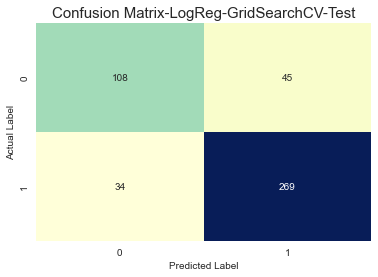

In [151]:
sns.heatmap(confusion_matrix(test_labels, log_pred_test2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-GridSearchCV-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [152]:
log_train_accu2 = best_model1.score(X_train,train_labels)
print("Accuracy score of Logistic Regression GridSearchCV Trained data is ",round(log_train_accu2,2))

Accuracy score of Logistic Regression GridSearchCV Trained data is  0.83


In [153]:
log_test_accu2 = best_model1.score(X_test,test_labels)
print("Accuracy score of Logistic Regression GridSearchCV Tested data is ",round(log_test_accu2,2))

Accuracy score of Logistic Regression GridSearchCV Tested data is  0.83


### ROC Curve and AUC Score - Train

In [154]:
probs = best_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc2 = roc_auc_score(train_labels, probs)
print('AUC Score for logReg GridSearchCV train data: %.3f' % log_train_auc2)
# calculate roc curve
log_train_fpr2, log_train_tpr2, log_train_thresholds2 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr2, log_train_tpr2, marker='.')
plt.title('ROC Curve-logReg-GridSearchCV-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for logReg GridSearchCV train data: 0.889


### ROC Curve and AUC Score - Test

In [155]:
probs = best_model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc2 = roc_auc_score(test_labels, probs)
print('AUC Score for logReg GridSearchCV test data: %.3f' % log_test_auc2)
# calculate roc curve
log_test_fpr2, log_test_tpr2, log_test_thresholds2 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr2, log_test_tpr2, marker='.')
plt.title('ROC Curve-logReg-GridSearchCV-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for logReg GridSearchCV test data: 0.883


### Model 6 - SMOTE Logistic Regression

### Classification Report -Train Data

In [156]:
print(classification_report(train_labels_res,log_SM_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [157]:
log_train_classifRepoSM = classification_report(train_labels_res,log_SM_pred_train,output_dict=True)
log_trainSM = pd.DataFrame(log_train_classifRepoSM).transpose()

log_SM_train_precision_conserv = round(log_trainSM.loc["0"][0],2)
log_SM_train_recall_conserv = round(log_trainSM.loc["0"][1],2)
log_SM_train_f1_conserv = round(log_trainSM.loc["0"][2],2)

log_SM_train_precision_labour = round(log_trainSM.loc["1"][0],2)
log_SM_train_recall_labour = round(log_trainSM.loc["1"][1],2)
log_SM_train_f1_labour = round(log_trainSM.loc["1"][2],2)

print ('Logistic Regression SMOTE Labour Train precision :',log_SM_train_precision_labour)
print ('Logistic Regression SMOTE Labour Train recall : ',log_SM_train_recall_labour)
print ('Logistic Regression SMOTE Labour Train f1 : ',log_SM_train_f1_labour)

print ('Logistic Regression SMOTE Conservative Train precision :',log_SM_train_precision_conserv)
print ('Logistic Regression SMOTE Conservative Train recall : ',log_SM_train_recall_conserv)
print ('Logistic Regression SMOTE Conservative Train f1 : ',log_SM_train_f1_conserv)



Logistic Regression SMOTE Labour Train precision : 0.85
Logistic Regression SMOTE Labour Train recall :  0.83
Logistic Regression SMOTE Labour Train f1 :  0.84
Logistic Regression SMOTE Conservative Train precision : 0.83
Logistic Regression SMOTE Conservative Train recall :  0.85
Logistic Regression SMOTE Conservative Train f1 :  0.84


### Classification Report -Test Data

In [158]:
print(classification_report(test_labels,log_SM_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       153
           1       0.89      0.80      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.81      0.80      0.80       456



In [159]:
log_test_classifRepoSM = classification_report(test_labels,log_SM_pred_test,output_dict=True)
log_testSM = pd.DataFrame(log_test_classifRepoSM).transpose()

log_SM_test_precision_conserv = round(log_testSM.loc["0"][0],2)
log_SM_test_recall_conserv = round(log_testSM.loc["0"][1],2)
log_SM_test_f1_conserv = round(log_testSM.loc["0"][2],2)

log_SM_test_precision_labour = round(log_testSM.loc["1"][0],2)
log_SM_test_recall_labour = round(log_testSM.loc["1"][1],2)
log_SM_test_f1_labour = round(log_testSM.loc["1"][2],2)

print ('Logistic Regression SMOTE Labour Test precision :',log_SM_test_precision_labour)
print ('Logistic Regression SMOTE Labour Test recall : ',log_SM_test_recall_labour)
print ('Logistic Regression SMOTE Labour Test f1 : ',log_SM_test_f1_labour)

print ('Logistic Regression SMOTE Conservative Test precision :',log_SM_test_precision_conserv)
print ('Logistic Regression SMOTE Conservative Test recall : ',log_SM_test_recall_conserv)
print ('Logistic Regression SMOTE Conservative Test f1 : ',log_SM_test_f1_conserv)



Logistic Regression SMOTE Labour Test precision : 0.89
Logistic Regression SMOTE Labour Test recall :  0.8
Logistic Regression SMOTE Labour Test f1 :  0.84
Logistic Regression SMOTE Conservative Test precision : 0.66
Logistic Regression SMOTE Conservative Test recall :  0.8
Logistic Regression SMOTE Conservative Test f1 :  0.73


### Confusion Matrix - Train Data

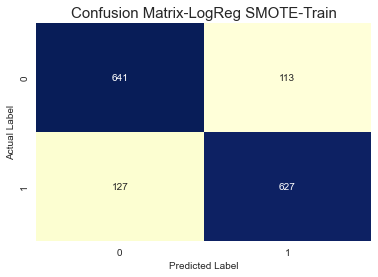

In [160]:
sns.heatmap(confusion_matrix(train_labels_res, log_SM_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg SMOTE-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

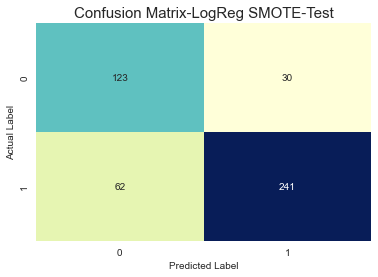

In [161]:
sns.heatmap(confusion_matrix(test_labels, log_SM_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg SMOTE-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [162]:
log_train_accuSM = log_SM_model.score(X_train_res,train_labels_res)
print("Accuracy score of Logistic Regression SMOTE Trained data is ",round(log_train_accuSM,2))

Accuracy score of Logistic Regression SMOTE Trained data is  0.84


In [163]:
log_test_accuSM = log_SM_model.score(X_test,test_labels)
print("Accuracy score of Logistic Regression SMOTE Tested data is ",round(log_test_accuSM,2))

Accuracy score of Logistic Regression SMOTE Tested data is  0.8


### ROC Curve and AUC Score - Train

In [164]:
probs = log_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_aucSM = roc_auc_score(train_labels_res, probs)
print('AUC Score for logReg SMOTE train data: %.3f' % log_train_aucSM)
# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fprSM, log_train_tprSM, log_train_thresholdsSM = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fprSM, log_train_tprSM, marker='.')
plt.title('ROC Curve-logReg SMOTE-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for logReg SMOTE train data: 0.911


### ROC Curve and AUC Score - Test

AUC Score for logReg SMOTE test data: 0.867


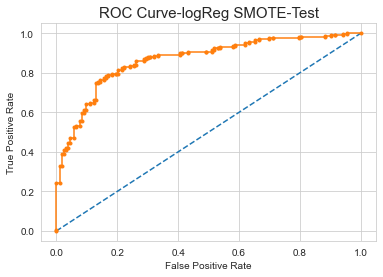

In [165]:
probs = log_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_aucSM = roc_auc_score(test_labels, probs)
print('AUC Score for logReg SMOTE test data: %.3f' % log_test_aucSM)
# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fprSM, log_test_tprSM, log_test_thresholdsSM = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fprSM, log_test_tprSM, marker='.')
plt.title('ROC Curve-logReg SMOTE-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 2 - Basic LDA Model

### Classification Report -Train Data

In [166]:
print(classification_report(train_labels,lda_pred_train1))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [167]:
lda_train_classifRepo1 = classification_report(train_labels,lda_pred_train1,output_dict=True)
lda_train1 = pd.DataFrame(lda_train_classifRepo1).transpose()

lda_train_precision1_conserv = round(lda_train1.loc["0"][0],2)
lda_train_recall1_conserv = round(lda_train1.loc["0"][1],2)
lda_train_f1_1_conserv = round(lda_train1.loc["0"][2],2)

lda_train_precision1_labour = round(lda_train1.loc["1"][0],2)
lda_train_recall1_labour = round(lda_train1.loc["1"][1],2)
lda_train_f1_1_labour = round(lda_train1.loc["1"][2],2)


print ('LDA Conservative Train precision :',lda_train_precision1_conserv)
print ('LDA Conservative Train recall : ',lda_train_recall1_conserv)
print ('LDA Conservative Train f1 : ',lda_train_f1_1_conserv)

print ('LDA Labour Train precision :',lda_train_precision1_labour)
print ('LDA Labour Train recall : ',lda_train_recall1_labour)
print ('LDA Labour Train f1 : ',lda_train_f1_1_labour)



LDA Conservative Train precision : 0.74
LDA Conservative Train recall :  0.65
LDA Conservative Train f1 :  0.69
LDA Labour Train precision : 0.86
LDA Labour Train recall :  0.91
LDA Labour Train f1 :  0.89


### Classification Report -Test Data

In [168]:
print(classification_report(test_labels,lda_pred_test1))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [169]:
lda_test_classifRepo1 = classification_report(test_labels,lda_pred_test1,output_dict=True)
lda_test1 = pd.DataFrame(lda_test_classifRepo1).transpose()

lda_test_precision1_conserv = round(lda_test1.loc["0"][0],2)
lda_test_recall1_conserv = round(lda_test1.loc["0"][1],2)
lda_test_f1_1_conserv = round(lda_test1.loc["0"][2],2)

lda_test_precision1_labour = round(lda_test1.loc["1"][0],2)
lda_test_recall1_labour = round(lda_test1.loc["1"][1],2)
lda_test_f1_1_labour = round(lda_test1.loc["1"][2],2)


print ('LDA Conservative Test precision :',lda_test_precision1_conserv)
print ('LDA Conservative Test recall : ',lda_test_recall1_conserv)
print ('LDA Conservative Test f1 : ',lda_test_f1_1_conserv)

print ('LDA Labour Test precision :',lda_test_precision1_labour)
print ('LDA Labour Test recall : ',lda_test_recall1_labour)
print ('LDA Labour Test f1 : ',lda_test_f1_1_labour)


LDA Conservative Test precision : 0.77
LDA Conservative Test recall :  0.73
LDA Conservative Test f1 :  0.74
LDA Labour Test precision : 0.86
LDA Labour Test recall :  0.89
LDA Labour Test f1 :  0.88


### Confusion Matrix - Train Data

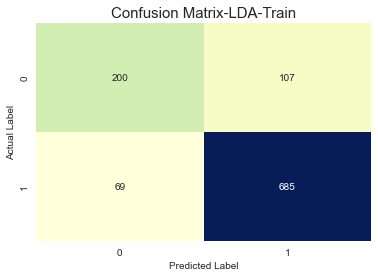

In [170]:
sns.heatmap(confusion_matrix(train_labels, lda_pred_train1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

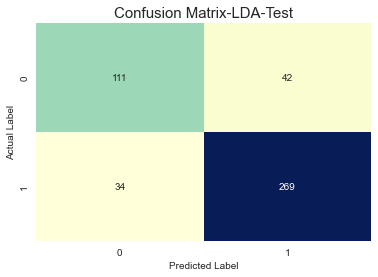

In [171]:
sns.heatmap(confusion_matrix(test_labels, lda_pred_test1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [172]:
lda_train_accu1 = lda_model1.score(X_train,train_labels)
print("Accuracy score of LDA Trained data is ",round(lda_train_accu1,2))

Accuracy score of LDA Trained data is  0.83


In [173]:
lda_test_accu1 = lda_model1.score(X_test,test_labels)
print("Accuracy score of LDA Tested data is ",round(lda_test_accu1,2))

Accuracy score of LDA Tested data is  0.83


### ROC Curve and AUC Score - Train

AUC Score for LDA train data: 0.889


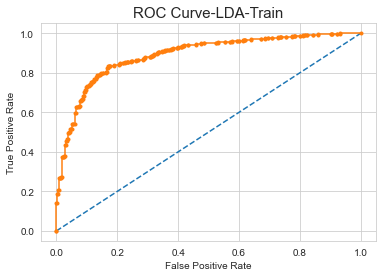

In [174]:
probs = lda_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc1 = roc_auc_score(train_labels, probs)
print('AUC Score for LDA train data: %.3f' % lda_train_auc1)
# calculate roc curve
lda_train_fpr1, lda_train_tpr1, lda_train_thresholds1 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr1, lda_train_tpr1, marker='.')
plt.title('ROC Curve-LDA-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for LDA test data: 0.888


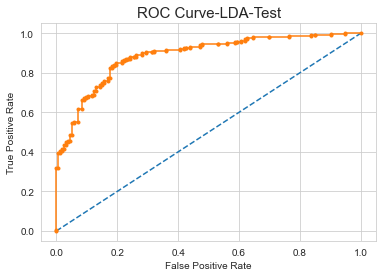

In [175]:
probs = lda_model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc1= roc_auc_score(test_labels, probs)
print('AUC Score for LDA test data: %.3f' % lda_test_auc1)
# calculate roc curve
lda_test_fpr1, lda_test_tpr1, lda_test_thresholds1 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr1, lda_test_tpr1, marker='.')
plt.title('ROC Curve-LDA-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 7 - GridSearchCV LDA

### Classification Report -Train Data

In [176]:
print(classification_report(train_labels,lda_pred_train2))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [177]:
lda_train_classifRepo2 = classification_report(train_labels,lda_pred_train2,output_dict=True)
lda_train2 = pd.DataFrame(lda_train_classifRepo2).transpose()

lda_train_precision2_conserv = round(lda_train2.loc["0"][0],2)
lda_train_recall2_conserv = round(lda_train2.loc["0"][1],2)
lda_train_f1_2_conserv = round(lda_train2.loc["0"][2],2)

lda_train_precision2_labour = round(lda_train2.loc["1"][0],2)
lda_train_recall2_labour = round(lda_train2.loc["1"][1],2)
lda_train_f1_2_labour = round(lda_train2.loc["1"][2],2)

print ('LDA GridSearchCV Conservative Train precision :',lda_train_precision2_conserv)
print ('LDA GridSearchCV Conservative Train recall : ',lda_train_recall2_conserv)
print ('LDA GridSearchCV Conservative Train f1 : ',lda_train_f1_2_conserv)

print ('LDA GridSearchCV Labour Train precision :',lda_train_precision2_labour)
print ('LDA GridSearchCV Labour Train recall : ',lda_train_recall2_labour)
print ('LDA GridSearchCV Labour Train f1 : ',lda_train_f1_2_labour)


LDA GridSearchCV Conservative Train precision : 0.74
LDA GridSearchCV Conservative Train recall :  0.65
LDA GridSearchCV Conservative Train f1 :  0.69
LDA GridSearchCV Labour Train precision : 0.86
LDA GridSearchCV Labour Train recall :  0.91
LDA GridSearchCV Labour Train f1 :  0.89


### Classification Report -Test Data

In [178]:
print(classification_report(test_labels,lda_pred_test2))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [179]:
lda_test_classifRepo2 = classification_report(test_labels,lda_pred_test2,output_dict=True)
lda_test2 = pd.DataFrame(lda_test_classifRepo2).transpose()

lda_test_precision2_conserv = round(lda_test2.loc["0"][0],2)
lda_test_recall2_conserv = round(lda_test2.loc["0"][1],2)
lda_test_f1_2_conserv = round(lda_test2.loc["0"][2],2)

lda_test_precision2_labour = round(lda_test2.loc["1"][0],2)
lda_test_recall2_labour = round(lda_test2.loc["1"][1],2)
lda_test_f1_2_labour = round(lda_test2.loc["1"][2],2)

print ('LDA GridSearchCV Conservative Test precision :',lda_test_precision2_conserv)
print ('LDA GridSearchCV Conservative Test recall : ',lda_test_recall2_conserv)
print ('LDA GridSearchCV Conservative Test f1 : ',lda_test_f1_2_conserv)

print ('LDA GridSearchCV Labour Test precision :',lda_test_precision2_labour)
print ('LDA GridSearchCV Labour Test recall : ',lda_test_recall2_labour)
print ('LDA GridSearchCV Labour Test f1 : ',lda_test_f1_2_labour)


LDA GridSearchCV Conservative Test precision : 0.77
LDA GridSearchCV Conservative Test recall :  0.73
LDA GridSearchCV Conservative Test f1 :  0.74
LDA GridSearchCV Labour Test precision : 0.86
LDA GridSearchCV Labour Test recall :  0.89
LDA GridSearchCV Labour Test f1 :  0.88


### Confusion Matrix - Train Data

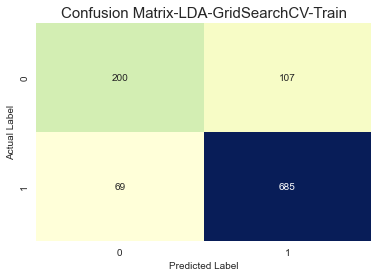

In [180]:
sns.heatmap(confusion_matrix(train_labels, lda_pred_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-GridSearchCV-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

In [181]:
sns.heatmap(confusion_matrix(test_labels, lda_pred_test2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-GridSearchCV-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [182]:
lda_train_accu2 = best_model2.score(X_train,train_labels)
print("Accuracy score of LDA GridSearchCV Trained data is ",round(lda_train_accu2,2))

Accuracy score of LDA GridSearchCV Trained data is  0.83


In [183]:
lda_test_accu2 = best_model2.score(X_test,test_labels)
print("Accuracy score of LDA GridSearchCV Tested data is ",round(lda_test_accu2,2))

Accuracy score of LDA GridSearchCV Tested data is  0.83


### ROC Curve and AUC Score - Train

AUC Score for LDA GridSearchCV train data: 0.889


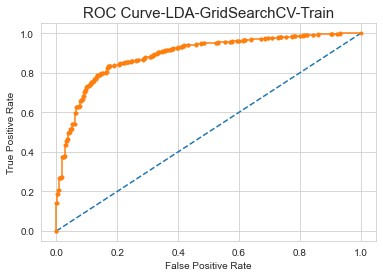

In [184]:
probs = best_model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc2 = roc_auc_score(train_labels, probs)
print('AUC Score for LDA GridSearchCV train data: %.3f' % lda_train_auc2)
# calculate roc curve
lda_train_fpr2, lda_train_tpr2, lda_train_thresholds2 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr2, lda_train_tpr2, marker='.')
plt.title('ROC Curve-LDA-GridSearchCV-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for LDA GridSearchCV test data: 0.888


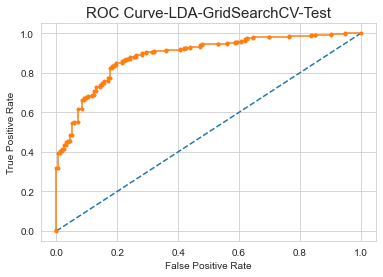

In [185]:
probs = best_model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc2 = roc_auc_score(test_labels, probs)
print('AUC Score for LDA GridSearchCV test data: %.3f' % lda_test_auc2)
# calculate roc curve
lda_test_fpr2, lda_test_tpr2, lda_test_thresholds2 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr2, lda_test_tpr2, marker='.')
plt.title('ROC Curve-LDA-GridSearchCV-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 8 - SMOTE LDA Model

### Classification Report -Train Data

In [186]:
print(classification_report(train_labels_res,lda_SM_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [187]:
lda_train_classifRepoSM = classification_report(train_labels_res,lda_SM_pred_train,output_dict=True)
lda_trainSM = pd.DataFrame(lda_train_classifRepoSM).transpose()

lda_SM_train_precision_conserv = round(lda_trainSM.loc["0"][0],2)
lda_SM_train_recall_conserv = round(lda_trainSM.loc["0"][1],2)
lda_SM_train_f1_conserv = round(lda_trainSM.loc["0"][2],2)

lda_SM_train_precision_labour = round(lda_trainSM.loc["1"][0],2)
lda_SM_train_recall_labour = round(lda_trainSM.loc["1"][1],2)
lda_SM_train_f1_labour = round(lda_trainSM.loc["1"][2],2)


print ('LDA SMOTE Conservative Train precision :',lda_SM_train_precision_conserv)
print ('LDA SMOTE Conservative Train recall : ',lda_SM_train_recall_conserv)
print ('LDA SMOTE Conservative Train f1 : ',lda_SM_train_f1_conserv)

print ('LDA SMOTE Labour Train precision :',lda_SM_train_precision_labour)
print ('LDA SMOTE Labour Train recall : ',lda_SM_train_recall_labour)
print ('LDA SMOTE Labour Train f1 : ',lda_SM_train_f1_labour)



LDA SMOTE Conservative Train precision : 0.84
LDA SMOTE Conservative Train recall :  0.85
LDA SMOTE Conservative Train f1 :  0.84
LDA SMOTE Labour Train precision : 0.85
LDA SMOTE Labour Train recall :  0.83
LDA SMOTE Labour Train f1 :  0.84


### Classification Report -Test Data

In [188]:
print(classification_report(test_labels,lda_SM_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.83      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.83      0.81      0.81       456



In [189]:
lda_test_classifRepoSM = classification_report(test_labels,lda_SM_pred_test,output_dict=True)
lda_testSM = pd.DataFrame(lda_test_classifRepoSM).transpose()

lda_SM_test_precision_conserv = round(lda_testSM.loc["0"][0],2)
lda_SM_test_recall_conserv = round(lda_testSM.loc["0"][1],2)
lda_SM_test_f1_conserv = round(lda_testSM.loc["0"][2],2)

lda_SM_test_precision_labour = round(lda_testSM.loc["1"][0],2)
lda_SM_test_recall_labour = round(lda_testSM.loc["1"][1],2)
lda_SM_test_f1_labour = round(lda_testSM.loc["1"][2],2)


print ('LDA SMOTE Conservative Test precision :',lda_SM_test_precision_conserv)
print ('LDA SMOTE Conservative Test recall : ',lda_SM_test_recall_conserv)
print ('LDA SMOTE Conservative Test f1 : ',lda_SM_test_f1_conserv)

print ('LDA SMOTE Labour Test precision :',lda_SM_test_precision_labour)
print ('LDA SMOTE Labour Test recall : ',lda_SM_test_recall_labour)
print ('LDA SMOTE Labour Test f1 : ',lda_SM_test_f1_labour)


LDA SMOTE Conservative Test precision : 0.68
LDA SMOTE Conservative Test recall :  0.83
LDA SMOTE Conservative Test f1 :  0.74
LDA SMOTE Labour Test precision : 0.9
LDA SMOTE Labour Test recall :  0.8
LDA SMOTE Labour Test f1 :  0.85


### Confusion Matrix - Train Data

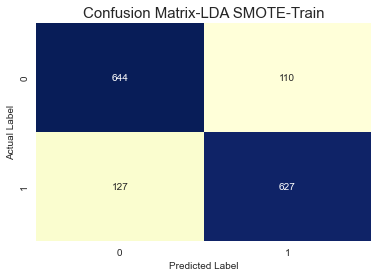

In [190]:
sns.heatmap(confusion_matrix(train_labels_res, lda_SM_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA SMOTE-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

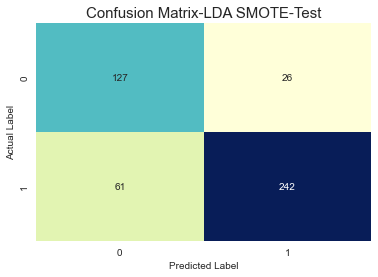

In [191]:
sns.heatmap(confusion_matrix(test_labels, lda_SM_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA SMOTE-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [192]:
lda_train_accuSM = lda_SM_model.score(X_train_res,train_labels_res)
print("Accuracy score of LDA SMOTE Trained data is ",round(lda_train_accuSM,2))

Accuracy score of LDA SMOTE Trained data is  0.84


In [193]:
lda_test_accuSM = lda_SM_model.score(X_test,test_labels)
print("Accuracy score of LDA SMOTE Tested data is ",round(lda_test_accuSM,2))

Accuracy score of LDA SMOTE Tested data is  0.81


### ROC Curve and AUC Score - Train

AUC Score for LDA SMOTEtrain data: 0.911


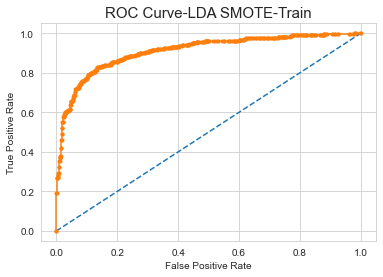

In [194]:
probs = lda_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_aucSM = roc_auc_score(train_labels_res, probs)
print('AUC Score for LDA SMOTEtrain data: %.3f' % lda_train_aucSM)
# calculate roc curve
lda_train_fprSM, lda_train_tprSM, lda_train_thresholdsSM = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fprSM, lda_train_tprSM, marker='.')
plt.title('ROC Curve-LDA SMOTE-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for LDA SMOTE test data: 0.871


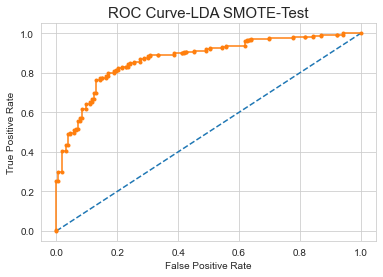

In [195]:
probs = lda_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_aucSM= roc_auc_score(test_labels, probs)
print('AUC Score for LDA SMOTE test data: %.3f' % lda_test_aucSM)
# calculate roc curve
lda_test_fprSM, lda_test_tprSM, lda_test_thresholdsSM = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fprSM, lda_test_tprSM, marker='.')
plt.title('ROC Curve-LDA SMOTE-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 3 - Basic KNN Model

### Classification Report -Train Data

In [196]:
print(classification_report(train_labels,KNN1_pred_train1))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [197]:
knn_train_classifRepo1 = classification_report(train_labels,KNN1_pred_train1,output_dict=True)
knn_train1 = pd.DataFrame(knn_train_classifRepo1).transpose()

knn_train_precision1_conserv = round(knn_train1.loc["0"][0],2)
knn_train_recall1_conserv = round(knn_train1.loc["0"][1],2)
knn_train_f1_1_conserv = round(knn_train1.loc["0"][2],2)

knn_train_precision1_labour = round(knn_train1.loc["1"][0],2)
knn_train_recall1_labour = round(knn_train1.loc["1"][1],2)
knn_train_f1_1_labour = round(knn_train1.loc["1"][2],2)

print ('KNN Conservative Train precision :',knn_train_precision1_conserv)
print ('KNN Conservative Train recall : ',knn_train_recall1_conserv)
print ('KNN Conservative Train f1 : ',knn_train_f1_1_conserv)

print ('KNN Labour Train precision :',knn_train_precision1_labour)
print ('KNN Labour Train recall : ',knn_train_recall1_labour)
print ('KNN Labour Train f1 : ',knn_train_f1_1_labour)


KNN Conservative Train precision : 0.77
KNN Conservative Train recall :  0.71
KNN Conservative Train f1 :  0.74
KNN Labour Train precision : 0.88
KNN Labour Train recall :  0.91
KNN Labour Train f1 :  0.9


### Classification Report -Test Data

In [198]:
print(classification_report(test_labels,KNN1_pred_test1))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [199]:
knn_test_classifRepo1 = classification_report(test_labels,KNN1_pred_test1,output_dict=True)
knn_test1 = pd.DataFrame(knn_test_classifRepo1).transpose()

knn_test_precision1_conserv = round(knn_test1.loc["0"][0],2)
knn_test_recall1_conserv = round(knn_test1.loc["0"][1],2)
knn_test_f1_1_conserv = round(knn_test1.loc["0"][2],2)

knn_test_precision1_labour = round(knn_test1.loc["1"][0],2)
knn_test_recall1_labour = round(knn_test1.loc["1"][1],2)
knn_test_f1_1_labour = round(knn_test1.loc["1"][2],2)

print ('KNN Conservative Test precision :',knn_test_precision1_conserv)
print ('KNN Conservative Test recall : ',knn_test_recall1_conserv)
print ('KNN Conservative Test f1 : ',knn_test_f1_1_conserv)

print ('KNN Labour Test precision :',knn_test_precision1_labour)
print ('KNN Labour Test recall : ',knn_test_recall1_labour)
print ('KNN Labour Test f1 : ',knn_test_f1_1_labour)


KNN Conservative Test precision : 0.78
KNN Conservative Test recall :  0.68
KNN Conservative Test f1 :  0.72
KNN Labour Test precision : 0.85
KNN Labour Test recall :  0.9
KNN Labour Test f1 :  0.87


### Confusion Matrix - Train Data

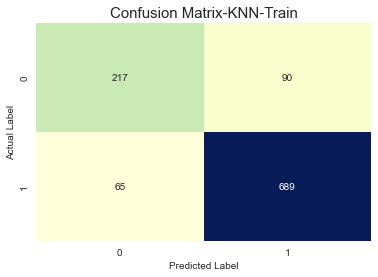

In [200]:
sns.heatmap(confusion_matrix(train_labels, KNN1_pred_train1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-KNN-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

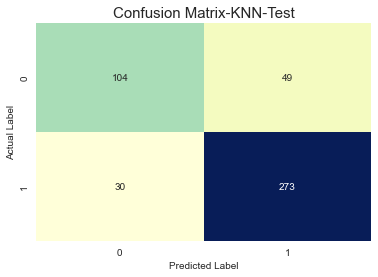

In [201]:
sns.heatmap(confusion_matrix(test_labels, KNN1_pred_test1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-KNN-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [202]:
knn_train_accu1 = KNN1.score(X_train_Scaled,train_labels)
print("Accuracy score of KNN Trained data is ",round(knn_train_accu1,2))

Accuracy score of KNN Trained data is  0.85


In [203]:
knn_test_accu1 = KNN1.score(X_test_Scaled,test_labels)
print("Accuracy score of KNN Tested data is ",round(knn_test_accu1,2))

Accuracy score of KNN Tested data is  0.83


### ROC Curve and AUC Score - Train

AUC Score for KNN train data: 0.928


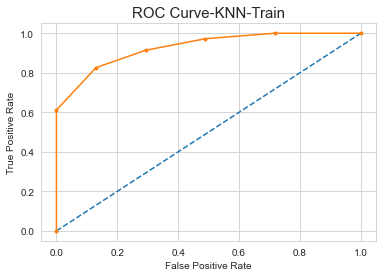

In [204]:
probs = KNN1.predict_proba(X_train_Scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc1 = roc_auc_score(train_labels, probs)
print('AUC Score for KNN train data: %.3f' % knn_train_auc1)
# calculate roc curve
knn_train_fpr1, knn_train_tpr1, knn_train_thresholds1 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr1, knn_train_tpr1, marker='.')
plt.title('ROC Curve-KNN-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

In [205]:
probs = KNN1.predict_proba(X_test_Scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc1 = roc_auc_score(test_labels, probs)
print('AUC Score for KNN test data: %.3f' % knn_test_auc1)
# calculate roc curve
knn_test_fpr1, knn_test_tpr1, knn_test_thresholds1 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr1, knn_test_tpr1, marker='.')
plt.title('ROC Curve-KNN-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for KNN test data: 0.868


### Model 9 - GridSearchCV KNN Model

### Classification Report -Train Data

In [206]:
print(classification_report(train_labels,knn_pred_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [207]:
knn_train_classifRepo2 = classification_report(train_labels,knn_pred_train2,output_dict=True)
knn_train2 = pd.DataFrame(knn_train_classifRepo2).transpose()

knn_train_precision2_conserv = round(knn_train2.loc["0"][0],2)
knn_train_recall2_conserv = round(knn_train2.loc["0"][1],2)
knn_train_f1_2_conserv = round(knn_train2.loc["0"][2],2)

knn_train_precision2_labour = round(knn_train2.loc["1"][0],2)
knn_train_recall2_labour = round(knn_train2.loc["1"][1],2)
knn_train_f1_2_labour = round(knn_train2.loc["1"][2],2)

print ('KNN GridSearchCV Conservative Train precision :',knn_train_precision2_conserv)
print ('KNN GridSearchCV Conservative Train recall : ',knn_train_recall2_conserv)
print ('KNN GridSearchCV Conservative Train f1 : ',knn_train_f1_2_conserv)

print ('KNN GridSearchCV Labour Train precision :',knn_train_precision2_labour)
print ('KNN GridSearchCV Labour Train recall : ',knn_train_recall2_labour)
print ('KNN GridSearchCV Labour Train f1 : ',knn_train_f1_2_labour)


KNN GridSearchCV Conservative Train precision : 1.0
KNN GridSearchCV Conservative Train recall :  1.0
KNN GridSearchCV Conservative Train f1 :  1.0
KNN GridSearchCV Labour Train precision : 1.0
KNN GridSearchCV Labour Train recall :  1.0
KNN GridSearchCV Labour Train f1 :  1.0


### Classification Report -Test Data

In [208]:
print(classification_report(test_labels,knn_pred_test2))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [209]:
knn_test_classifRepo2 = classification_report(test_labels,knn_pred_test2,output_dict=True)
knn_test2 = pd.DataFrame(knn_test_classifRepo2).transpose()

knn_test_precision2_conserv = round(knn_test2.loc["0"][0],2)
knn_test_recall2_conserv = round(knn_test2.loc["0"][1],2)
knn_test_f1_2_conserv = round(knn_test2.loc["0"][2],2)

knn_test_precision2_labour = round(knn_test2.loc["1"][0],2)
knn_test_recall2_labour = round(knn_test2.loc["1"][1],2)
knn_test_f1_2_labour = round(knn_test2.loc["1"][2],2)

print ('KNN GridSearchCV Conservative Test precision :',knn_test_precision2_conserv)
print ('KNN GridSearchCV Conservative Test recall : ',knn_test_recall2_conserv)
print ('KNN GridSearchCV Conservative Test f1 : ',knn_test_f1_2_conserv)

print ('KNN GridSearchCV Labour Test precision :',knn_test_precision2_labour)
print ('KNN GridSearchCV Labour Test recall : ',knn_test_recall2_labour)
print ('KNN GridSearchCV Labour Test f1 : ',knn_test_f1_2_labour)


KNN GridSearchCV Conservative Test precision : 0.79
KNN GridSearchCV Conservative Test recall :  0.65
KNN GridSearchCV Conservative Test f1 :  0.71
KNN GridSearchCV Labour Test precision : 0.84
KNN GridSearchCV Labour Test recall :  0.91
KNN GridSearchCV Labour Test f1 :  0.87


### Confusion Matrix - Train Data

In [210]:
sns.heatmap(confusion_matrix(train_labels, knn_pred_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-KNN-GridSearchCV-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

In [211]:
sns.heatmap(confusion_matrix(test_labels, knn_pred_test2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-KNN-GridSearchCV-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [212]:
knn_train_accu2 = best_model3.score(X_train_Scaled,train_labels)
print("Accuracy score of KNN GridSearchCV Trained data is ",round(knn_train_accu2,2))

Accuracy score of KNN GridSearchCV Trained data is  1.0


In [213]:
knn_test_accu2 = best_model3.score(X_test_Scaled,test_labels)
print("Accuracy score of KNN GridSearchCV Tested data is ",round(knn_test_accu2,2))

Accuracy score of KNN GridSearchCV Tested data is  0.82


### ROC Curve and AUC Score - Train

In [214]:
probs = best_model3.predict_proba(X_train_Scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc2 = roc_auc_score(train_labels, probs)
print('AUC Score for KNN GridSearchCV train data: %.3f' % knn_train_auc2)
# calculate roc curve
knn_train_fpr2, knn_train_tpr2, knn_train_thresholds2 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr2, knn_train_tpr2, marker='.')
plt.title('ROC Curve-KNN-GridSearchCV-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for KNN GridSearchCV train data: 1.000


### ROC Curve and AUC Score - Test

In [215]:
probs = best_model3.predict_proba(X_test_Scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc2 = roc_auc_score(test_labels, probs)
print('AUC Score for KNN GridSearchCV test data: %.3f' % knn_test_auc2)
# calculate roc curve
knn_test_fpr2, knn_test_tpr2, knn_test_thresholds2 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr2, knn_test_tpr2, marker='.')
plt.title('ROC Curve-KNN-GridSearchCV-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for KNN GridSearchCV test data: 0.892


### Model 10 - SMOTE KNN Model

### Classification Report -Train Data

In [216]:
print(classification_report(train_labels_res,knn_SM_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       754
           1       0.93      0.83      0.88       754

    accuracy                           0.88      1508
   macro avg       0.89      0.88      0.88      1508
weighted avg       0.89      0.88      0.88      1508



In [217]:
knn_train_classifRepoSM = classification_report(train_labels_res,knn_SM_pred_train,output_dict=True)
knn_trainSM = pd.DataFrame(knn_train_classifRepoSM).transpose()

knn_SM_train_precision_conserv = round(knn_trainSM.loc["0"][0],2)
knn_SM_train_recall_conserv = round(knn_trainSM.loc["0"][1],2)
knn_SM_train_f1_conserv = round(knn_trainSM.loc["0"][2],2)

knn_SM_train_precision_labour = round(knn_trainSM.loc["1"][0],2)
knn_SM_train_recall_labour = round(knn_trainSM.loc["1"][1],2)
knn_SM_train_f1_labour = round(knn_trainSM.loc["1"][2],2)

print ('KNN SMOTE Conservative Train precision :',knn_SM_train_precision_conserv)
print ('KNN SMOTE Conservative Train recall : ',knn_SM_train_recall_conserv)
print ('KNN SMOTE Conservative Train f1 : ',knn_SM_train_f1_conserv)

print ('KNN SMOTE Labour Train precision :',knn_SM_train_precision_labour)
print ('KNN SMOTE Labour Train recall : ',knn_SM_train_recall_labour)
print ('KNN SMOTE Labour Train f1 : ',knn_SM_train_f1_labour)


KNN SMOTE Conservative Train precision : 0.85
KNN SMOTE Conservative Train recall :  0.94
KNN SMOTE Conservative Train f1 :  0.89
KNN SMOTE Labour Train precision : 0.93
KNN SMOTE Labour Train recall :  0.83
KNN SMOTE Labour Train f1 :  0.88


### Classification Report -Test Data

In [218]:
print(classification_report(test_labels,knn_SM_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       153
           1       0.89      0.77      0.83       303

    accuracy                           0.79       456
   macro avg       0.77      0.79      0.77       456
weighted avg       0.81      0.79      0.79       456



In [219]:
knn_test_classifRepoSM = classification_report(test_labels,knn_SM_pred_test,output_dict=True)
knn_testSM = pd.DataFrame(knn_test_classifRepoSM).transpose()

knn_SM_test_precision_conserv = round(knn_testSM.loc["0"][0],2)
knn_SM_test_recall_conserv = round(knn_testSM.loc["0"][1],2)
knn_SM_test_f1_conserv = round(knn_testSM.loc["0"][2],2)

knn_SM_test_precision_labour = round(knn_testSM.loc["1"][0],2)
knn_SM_test_recall_labour = round(knn_testSM.loc["1"][1],2)
knn_SM_test_f1_labour = round(knn_testSM.loc["1"][2],2)

print ('KNN SMOTE Conservative Test precision :',knn_SM_test_precision_conserv)
print ('KNN SMOTE Conservative Test recall : ',knn_SM_test_recall_conserv)
print ('KNN SMOTE Conservative Test f1 : ',knn_SM_test_f1_conserv)

print ('KNN SMOTE Labour Test precision :',knn_SM_test_precision_labour)
print ('KNN SMOTE Labour Test recall : ',knn_SM_test_recall_labour)
print ('KNN SMOTE Labour Test f1 : ',knn_SM_test_f1_labour)


KNN SMOTE Conservative Test precision : 0.64
KNN SMOTE Conservative Test recall :  0.81
KNN SMOTE Conservative Test f1 :  0.72
KNN SMOTE Labour Test precision : 0.89
KNN SMOTE Labour Test recall :  0.77
KNN SMOTE Labour Test f1 :  0.83


### Confusion Matrix - Train Data

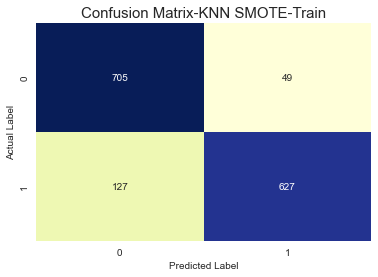

In [220]:
sns.heatmap(confusion_matrix(train_labels_res, knn_SM_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-KNN SMOTE-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

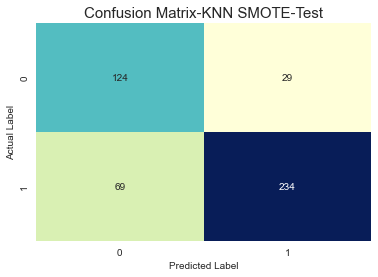

In [221]:
sns.heatmap(confusion_matrix(test_labels, knn_SM_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-KNN SMOTE-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [222]:
knn_train_accuSM = knn_SM_model.score(X_train_Scaled_res,train_labels_res)
print("Accuracy score of KNN SMOTE Trained data is ",round(knn_train_accuSM,2))

Accuracy score of KNN SMOTE Trained data is  0.88


In [223]:
knn_test_accuSM = knn_SM_model.score(X_test_Scaled,test_labels)
print("Accuracy score of KNN SMOTE Tested data is ",round(knn_test_accuSM,2))

Accuracy score of KNN SMOTE Tested data is  0.79


### ROC Curve and AUC Score - Train

In [224]:
probs = knn_SM_model.predict_proba(X_train_Scaled_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_aucSM = roc_auc_score(train_labels_res, probs)
print('AUC Score for KNN SMOTE train data: %.3f' % knn_train_aucSM)
# calculate roc curve
knn_train_fprSM, knn_train_tprSM, knn_train_thresholdsSM = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fprSM, knn_train_tprSM, marker='.')
plt.title('ROC Curve-KNN SMOTE-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for KNN SMOTE train data: 0.961


### ROC Curve and AUC Score - Test

In [225]:
probs = knn_SM_model.predict_proba(X_test_Scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_aucSM = roc_auc_score(test_labels, probs)
print('AUC Score for KNN SMOTE test data: %.3f' % knn_test_aucSM)
# calculate roc curve
knn_test_fprSM, knn_test_tprSM, knn_test_thresholdsSM = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fprSM, knn_test_tprSM, marker='.')
plt.title('ROC Curve-KNN SMOTE-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for KNN SMOTE test data: 0.865


### Model 4- Basic Naïve Bayes Model

### Classification Report -Train Data

In [226]:
print(classification_report(train_labels,GNB_pred_train1))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [227]:
GNB_train_classifRepo1 = classification_report(train_labels,GNB_pred_train1,output_dict=True)
GNB_train1 = pd.DataFrame(GNB_train_classifRepo1).transpose()

GNB_train_precision1_conserv = round(GNB_train1.loc["0"][0],2)
GNB_train_recall1_conserv = round(GNB_train1.loc["0"][1],2)
GNB_train_f1_1_conserv = round(GNB_train1.loc["0"][2],2)

GNB_train_precision1_labour = round(GNB_train1.loc["1"][0],2)
GNB_train_recall1_labour = round(GNB_train1.loc["1"][1],2)
GNB_train_f1_1_labour = round(GNB_train1.loc["1"][2],2)


print ('GNB Conservative Train precision :',GNB_train_precision1_conserv)
print ('GNB Conservative Train recall : ',GNB_train_recall1_conserv)
print ('GNB Conservative Train f1 : ',GNB_train_f1_1_conserv)

print ('GNB Labour Train precision :',GNB_train_precision1_labour)
print ('GNB Labour Train recall : ',GNB_train_recall1_labour)
print ('GNB Labour Train f1 : ',GNB_train_f1_1_labour)



GNB Conservative Train precision : 0.73
GNB Conservative Train recall :  0.69
GNB Conservative Train f1 :  0.71
GNB Labour Train precision : 0.88
GNB Labour Train recall :  0.9
GNB Labour Train f1 :  0.89


### Classification Report -Test Data

In [228]:
print(classification_report(test_labels,GNB_pred_test1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [229]:
GNB_test_classifRepo1 = classification_report(test_labels,GNB_pred_test1,output_dict=True)
GNB_test1 = pd.DataFrame(GNB_test_classifRepo1).transpose()

GNB_test_precision1_conserv = round(GNB_test1.loc["0"][0],2)
GNB_test_recall1_conserv = round(GNB_test1.loc["0"][1],2)
GNB_test_f1_1_conserv = round(GNB_test1.loc["0"][2],2)

GNB_test_precision1_labour = round(GNB_test1.loc["1"][0],2)
GNB_test_recall1_labour = round(GNB_test1.loc["1"][1],2)
GNB_test_f1_1_labour = round(GNB_test1.loc["1"][2],2)


print ('GNB Conservative Test precision :',GNB_test_precision1_conserv)
print ('GNB Conservative Test recall : ',GNB_test_recall1_conserv)
print ('GNB Conservative Test f1 : ',GNB_test_f1_1_conserv)

print ('GNB Labour Test precision :',GNB_test_precision1_labour)
print ('GNB Labour Test recall : ',GNB_test_recall1_labour)
print ('GNB Labour Test f1 : ',GNB_test_f1_1_labour)


GNB Conservative Test precision : 0.74
GNB Conservative Test recall :  0.73
GNB Conservative Test f1 :  0.73
GNB Labour Test precision : 0.87
GNB Labour Test recall :  0.87
GNB Labour Test f1 :  0.87


### Confusion Matrix - Train Data

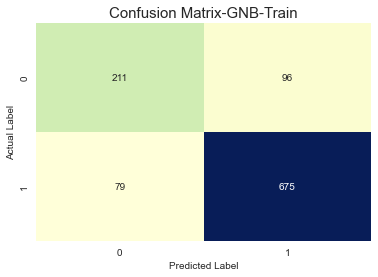

In [230]:
sns.heatmap(confusion_matrix(train_labels, GNB_pred_train1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GNB-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

In [231]:
sns.heatmap(confusion_matrix(test_labels, GNB_pred_test1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GNB-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [232]:
GNB_train_accu1 = GNB1.score(X_train,train_labels)
print("Accuracy score of GNB Trained data is ",round(GNB_train_accu1,2))

Accuracy score of GNB Trained data is  0.84


In [233]:
GNB_test_accu1 = GNB1.score(X_test,test_labels)
print("Accuracy score of GNB Tested data is ",round(GNB_test_accu1,2))

Accuracy score of GNB Tested data is  0.82


### ROC Curve and AUC Score - Train

AUC Score for GNB train data: 0.888


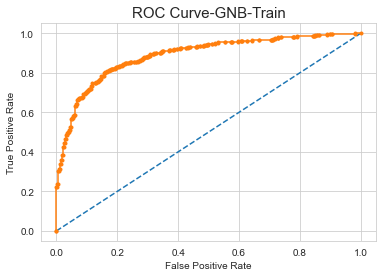

In [234]:
probs = GNB1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GNB_train_auc1 = roc_auc_score(train_labels, probs)
print('AUC Score for GNB train data: %.3f' % GNB_train_auc1)
# calculate roc curve
GNB_train_fpr1, GNB_train_tpr1, GNB_train_thresholds1 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GNB_train_fpr1, GNB_train_tpr1, marker='.')
plt.title('ROC Curve-GNB-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

In [235]:
probs = GNB1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GNB_test_auc1= roc_auc_score(test_labels, probs)
print('AUC Score for GNB test data: %.3f' % GNB_test_auc1)
# calculate roc curve
GNB_test_fpr1, GNB_test_tpr1, GNB_test_thresholds1 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GNB_test_fpr1, GNB_test_tpr1, marker='.')
plt.title('ROC Curve-GNB-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for GNB test data: 0.876


### Model 11- GridSearchCV Naïve Bayes Model

### Classification Report -Train Data

In [236]:
print(classification_report(train_labels,GNB_pred_train2))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [237]:
GNB_train_classifRepo2 = classification_report(train_labels,GNB_pred_train2,output_dict=True)
GNB_train2 = pd.DataFrame(GNB_train_classifRepo2).transpose()

GNB_train_precision2_conserv = round(GNB_train2.loc["0"][0],2)
GNB_train_recall2_conserv = round(GNB_train2.loc["0"][1],2)
GNB_train_f1_2_conserv = round(GNB_train2.loc["0"][2],2)

GNB_train_precision2_labour = round(GNB_train2.loc["1"][0],2)
GNB_train_recall2_labour = round(GNB_train2.loc["1"][1],2)
GNB_train_f1_2_labour = round(GNB_train2.loc["1"][2],2)

print ('GNB GridSearchCV Conservative Train precision :',GNB_train_precision2_conserv)
print ('GNB GridSearchCV Conservative Train recall : ',GNB_train_recall2_conserv)
print ('GNB GridSearchCV Conservative Train f1 : ',GNB_train_f1_2_conserv)

print ('GNB GridSearchCV Labour Train precision :',GNB_train_precision2_labour)
print ('GNB GridSearchCV Labour Train recall : ',GNB_train_recall2_labour)
print ('GNB GridSearchCV Labour Train f1 : ',GNB_train_f1_2_labour)


GNB GridSearchCV Conservative Train precision : 0.73
GNB GridSearchCV Conservative Train recall :  0.69
GNB GridSearchCV Conservative Train f1 :  0.71
GNB GridSearchCV Labour Train precision : 0.88
GNB GridSearchCV Labour Train recall :  0.9
GNB GridSearchCV Labour Train f1 :  0.89


### Classification Report -Test Data

In [238]:
print(classification_report(test_labels,GNB_pred_test2))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [239]:
GNB_test_classifRepo2 = classification_report(test_labels,GNB_pred_test2,output_dict=True)
GNB_test2 = pd.DataFrame(GNB_test_classifRepo2).transpose()

GNB_test_precision2_conserv = round(GNB_test2.loc["0"][0],2)
GNB_test_recall2_conserv = round(GNB_test2.loc["0"][1],2)
GNB_test_f1_2_conserv = round(GNB_test2.loc["0"][2],2)

GNB_test_precision2_labour = round(GNB_test2.loc["1"][0],2)
GNB_test_recall2_labour = round(GNB_test2.loc["1"][1],2)
GNB_test_f1_2_labour = round(GNB_test2.loc["1"][2],2)

print ('GNB GridSearchCV Conservative Test precision :',GNB_test_precision2_conserv)
print ('GNB GridSearchCV Conservative Test recall : ',GNB_test_recall2_conserv)
print ('GNB GridSearchCV Conservative Test f1 : ',GNB_test_f1_2_conserv)

print ('GNB GridSearchCV Labour Test precision :',GNB_test_precision2_labour)
print ('GNB GridSearchCV Labour Test recall : ',GNB_test_recall2_labour)
print ('GNB GridSearchCV Labour Test f1 : ',GNB_test_f1_2_labour)


GNB GridSearchCV Conservative Test precision : 0.74
GNB GridSearchCV Conservative Test recall :  0.73
GNB GridSearchCV Conservative Test f1 :  0.74
GNB GridSearchCV Labour Test precision : 0.87
GNB GridSearchCV Labour Test recall :  0.87
GNB GridSearchCV Labour Test f1 :  0.87


### Confusion Matrix - Train Data

In [240]:
sns.heatmap(confusion_matrix(train_labels, GNB_pred_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GNB-GridSearchCV-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

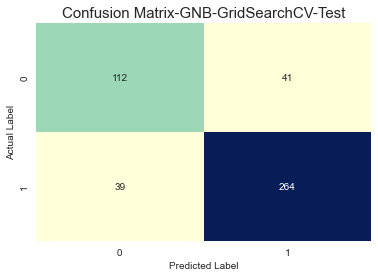

In [241]:
sns.heatmap(confusion_matrix(test_labels, GNB_pred_test2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GNB-GridSearchCV-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [242]:
GNB_train_accu2 = best_model4.score(X_train,train_labels)
print("Accuracy score of GNB GridSearchCV Trained data is ",round(GNB_train_accu2,2))

Accuracy score of GNB GridSearchCV Trained data is  0.84


In [243]:
GNB_test_accu2 = best_model4.score(X_test,test_labels)
print("Accuracy score of GNB GridSearchCV Tested data is ",round(GNB_test_accu2,2))

Accuracy score of GNB GridSearchCV Tested data is  0.82


### ROC Curve and AUC Score - Train

In [244]:
probs = best_model4.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GNB_train_auc2 = roc_auc_score(train_labels, probs)
print('AUC Score for GNB GridSearchCV train data: %.3f' % GNB_train_auc2)
# calculate roc curve
GNB_train_fpr2, GNB_train_tpr2, GNB_train_thresholds2 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GNB_train_fpr2, GNB_train_tpr2, marker='.')
plt.title('ROC Curve-GNB-GridSearchCV-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for GNB GridSearchCV train data: 0.888


### ROC Curve and AUC Score - Test

AUC Score for GNB GridSearchCV test data: 0.877


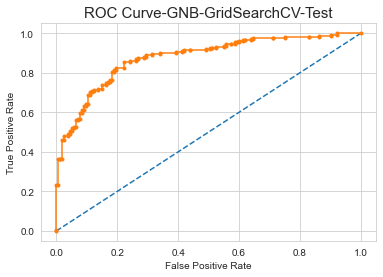

In [245]:
probs = best_model4.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GNB_test_auc2 = roc_auc_score(test_labels, probs)
print('AUC Score for GNB GridSearchCV test data: %.3f' % GNB_test_auc2)
# calculate roc curve
GNB_test_fpr2, GNB_test_tpr2, GNB_test_thresholds2 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GNB_test_fpr2, GNB_test_tpr2, marker='.')
plt.title('ROC Curve-GNB-GridSearchCV-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 12- SMOTE Naïve Bayes Model

### Classification Report -Train Data

In [246]:
print(classification_report(train_labels_res,GNB_SM_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       754
           1       0.84      0.84      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [247]:
GNB_SM_train_classifRepo = classification_report(train_labels_res,GNB_SM_pred_train,output_dict=True)
GNB_SM_train = pd.DataFrame(GNB_SM_train_classifRepo).transpose()

GNB_SM_train_precision_conserv = round(GNB_SM_train.loc["0"][0],2)
GNB_SM_train_recall_conserv = round(GNB_SM_train.loc["0"][1],2)
GNB_SM_train_f1_conserv = round(GNB_SM_train.loc["0"][2],2)

GNB_SM_train_precision_labour = round(GNB_SM_train.loc["1"][0],2)
GNB_SM_train_recall_labour = round(GNB_SM_train.loc["1"][1],2)
GNB_SM_train_f1_labour = round(GNB_SM_train.loc["1"][2],2)


print ('GNB SMOTE Conservative Train precision :',GNB_SM_train_precision_conserv)
print ('GNB SMOTE Conservative Train recall : ',GNB_SM_train_recall_conserv)
print ('GNB SMOTE Conservative Train f1 : ',GNB_SM_train_f1_conserv)

print ('GNB SMOTE Labour Train precision :',GNB_SM_train_precision_labour)
print ('GNB SMOTE Labour Train recall : ',GNB_SM_train_recall_labour)
print ('GNB SMOTE Labour Train f1 : ',GNB_SM_train_f1_labour)



GNB SMOTE Conservative Train precision : 0.84
GNB SMOTE Conservative Train recall :  0.84
GNB SMOTE Conservative Train f1 :  0.84
GNB SMOTE Labour Train precision : 0.84
GNB SMOTE Labour Train recall :  0.84
GNB SMOTE Labour Train f1 :  0.84


### Classification Report -Test Data

In [248]:
print(classification_report(test_labels,GNB_SM_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       153
           1       0.88      0.82      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



In [249]:
GNB_SM_test_classifRepo = classification_report(test_labels,GNB_SM_pred_test,output_dict=True)
GNB_SM_test = pd.DataFrame(GNB_SM_test_classifRepo).transpose()

GNB_SM_test_precision_conserv = round(GNB_SM_test.loc["0"][0],2)
GNB_SM_test_recall_conserv = round(GNB_SM_test.loc["0"][1],2)
GNB_SM_test_f1_conserv = round(GNB_SM_test.loc["0"][2],2)

GNB_SM_test_precision_labour = round(GNB_SM_test.loc["1"][0],2)
GNB_SM_test_recall_labour = round(GNB_SM_test.loc["1"][1],2)
GNB_SM_test_f1_labour = round(GNB_SM_test.loc["1"][2],2)


print ('GNB SMOTE Conservative Test precision :',GNB_SM_test_precision_conserv)
print ('GNB SMOTE Conservative Test recall : ',GNB_SM_test_recall_conserv)
print ('GNB SMOTE Conservative Test f1 : ',GNB_SM_test_f1_conserv)

print ('GNB SMOTE Labour Test precision :',GNB_SM_test_precision_labour)
print ('GNB SMOTE Labour Test recall : ',GNB_SM_test_recall_labour)
print ('GNB SMOTE Labour Test f1 : ',GNB_SM_test_f1_labour)


GNB SMOTE Conservative Test precision : 0.68
GNB SMOTE Conservative Test recall :  0.77
GNB SMOTE Conservative Test f1 :  0.72
GNB SMOTE Labour Test precision : 0.88
GNB SMOTE Labour Test recall :  0.82
GNB SMOTE Labour Test f1 :  0.84


### Confusion Matrix - Train Data

In [250]:
sns.heatmap(confusion_matrix(train_labels_res, GNB_SM_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GNB SMOTE-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

In [251]:
sns.heatmap(confusion_matrix(test_labels, GNB_SM_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GNB SMOTE-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [252]:
GNB_SM_train_accu = GNB_SM_model.score(X_train_res,train_labels_res)
print("Accuracy score of GNB SMOTE Trained data is ",round(GNB_SM_train_accu,2))

Accuracy score of GNB SMOTE Trained data is  0.84


In [253]:
GNB_SM_test_accu = GNB_SM_model.score(X_test,test_labels)
print("Accuracy score of GNB SMOTE Tested data is ",round(GNB_SM_test_accu,2))

Accuracy score of GNB SMOTE Tested data is  0.8


### ROC Curve and AUC Score - Train

In [254]:
probs = GNB_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GNB_SM_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC Score for GNB SMOTE train data: %.3f' % GNB_SM_train_auc)
# calculate roc curve
GNB_SM_train_fpr, GNB_SM_train_tpr, GNB_SM_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GNB_SM_train_fpr, GNB_SM_train_tpr, marker='.')
plt.title('ROC Curve-GNB SMOTE-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for GNB SMOTE train data: 0.912


### ROC Curve and AUC Score - Test

AUC Score for GNB SMOTE test data: 0.863


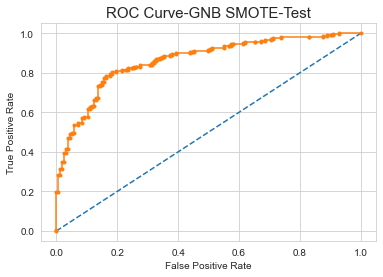

In [255]:
probs = GNB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GNB_SM_test_auc= roc_auc_score(test_labels, probs)
print('AUC Score for GNB SMOTE test data: %.3f' % GNB_SM_test_auc)
# calculate roc curve
GNB_SM_test_fpr, GNB_SM_test_tpr, GNB_SM_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GNB_SM_test_fpr, GNB_SM_test_tpr, marker='.')
plt.title('ROC Curve-GNB SMOTE-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 13 - Basic Bagging Classifier Random Forest


### Classification Report -Train Data

In [256]:
print(classification_report(train_labels,Bagging_RF_pred_train1))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [257]:
bagRF_train_classifRepo1 = classification_report(train_labels,Bagging_RF_pred_train1,output_dict=True)
bagRF_train1 = pd.DataFrame(bagRF_train_classifRepo1).transpose()

bagRF_train_precision1_conserv = round(bagRF_train1.loc["0"][0],2)
bagRF_train_recall1_conserv = round(bagRF_train1.loc["0"][1],2)
bagRF_train_f1_1_conserv = round(bagRF_train1.loc["0"][2],2)

bagRF_train_precision1_labour = round(bagRF_train1.loc["1"][0],2)
bagRF_train_recall1_labour = round(bagRF_train1.loc["1"][1],2)
bagRF_train_f1_1_labour = round(bagRF_train1.loc["1"][2],2)


print ('Bagging RF ConservativFe Train precision :',bagRF_train_precision1_conserv)
print ('Bagging RF Conservative Train recall : ',bagRF_train_recall1_conserv)
print ('Bagging RF Conservative Train f1 : ',bagRF_train_f1_1_conserv)

print ('Bagging RF Labour Train precision :',bagRF_train_precision1_labour)
print ('Bagging RF Labour Train recall : ',bagRF_train_recall1_labour)
print ('Bagging RF Labour Train f1 : ',bagRF_train_f1_1_labour)



Bagging RF ConservativFe Train precision : 0.99
Bagging RF Conservative Train recall :  0.9
Bagging RF Conservative Train f1 :  0.94
Bagging RF Labour Train precision : 0.96
Bagging RF Labour Train recall :  0.99
Bagging RF Labour Train f1 :  0.98


### Classification Report -Test Data

In [258]:
print(classification_report(test_labels,Bagging_RF_pred_test1))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [259]:
bagRF_test_classifRepo1 = classification_report(test_labels,Bagging_RF_pred_test1,output_dict=True)
bagRF_test1 = pd.DataFrame(bagRF_test_classifRepo1).transpose()

bagRF_test_precision1_conserv = round(bagRF_test1.loc["0"][0],2)
bagRF_test_recall1_conserv = round(bagRF_test1.loc["0"][1],2)
bagRF_test_f1_1_conserv = round(bagRF_test1.loc["0"][2],2)

bagRF_test_precision1_labour = round(bagRF_test1.loc["1"][0],2)
bagRF_test_recall1_labour = round(bagRF_test1.loc["1"][1],2)
bagRF_test_f1_1_labour = round(bagRF_test1.loc["1"][2],2)


print ('Bagging RF Conservative Test precision :',bagRF_test_precision1_conserv)
print ('Bagging RF Conservative Test recall : ',bagRF_test_recall1_conserv)
print ('Bagging RF Conservative Test f1 : ',bagRF_test_f1_1_conserv)

print ('Bagging RF Labour Test precision :',bagRF_test_precision1_labour)
print ('Bagging RF Labour Test recall : ',bagRF_test_recall1_labour)
print ('Bagging RF Labour Test f1 : ',bagRF_test_f1_1_labour)


Bagging RF Conservative Test precision : 0.78
Bagging RF Conservative Test recall :  0.68
Bagging RF Conservative Test f1 :  0.73
Bagging RF Labour Test precision : 0.85
Bagging RF Labour Test recall :  0.9
Bagging RF Labour Test f1 :  0.88


### Confusion Matrix - Train Data

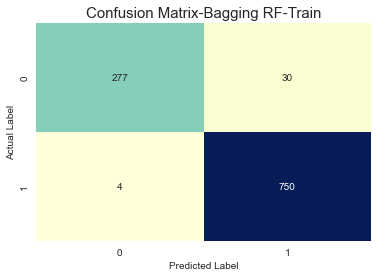

In [260]:
sns.heatmap(confusion_matrix(train_labels, Bagging_RF_pred_train1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Bagging RF-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

In [261]:
sns.heatmap(confusion_matrix(test_labels, Bagging_RF_pred_test1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Bagging RF-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [262]:
bagRF_train_accu1 = Bagging_model_RF1.score(X_train,train_labels)
print("Accuracy score of Bagging RF Trained data is ",round(bagRF_train_accu1,2))

Accuracy score of Bagging RF Trained data is  0.97


In [263]:
bagRF_test_accu1 = Bagging_model_RF1.score(X_test,test_labels)
print("Accuracy score of Bagging RF Tested data is ",round(bagRF_test_accu1,2))

Accuracy score of Bagging RF Tested data is  0.83


### ROC Curve and AUC Score - Train

In [264]:
probs = Bagging_model_RF1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagRF_train_auc1 = roc_auc_score(train_labels, probs)
print('AUC Score for Bagging RF train data: %.3f' % bagRF_train_auc1)
# calculate roc curve
bagRF_train_fpr1, bagRF_train_tpr1, bagRF_train_thresholds1 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagRF_train_fpr1, bagRF_train_tpr1, marker='.')
plt.title('ROC Curve-Bagging RF-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for Bagging RF train data: 0.997


### ROC Curve and AUC Score - Test

In [265]:
probs = Bagging_model_RF1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagRF_test_auc1= roc_auc_score(test_labels, probs)
print('AUC Score for Bagging RF test data: %.3f' % bagRF_test_auc1)
# calculate roc curve
bagRF_test_fpr1, bagRF_test_tpr1, bagRF_test_thresholds1 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagRF_test_fpr1, bagRF_test_tpr1, marker='.')
plt.title('ROC Curve-Bagging RF-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for Bagging RF test data: 0.897


### Model 14 - GridSeacrhCV Bagging RF Model

### Classification Report -Train Data

In [266]:
print(classification_report(train_labels,Bagging_RF_pred_train2))

              precision    recall  f1-score   support

           0       0.85      0.39      0.54       307
           1       0.80      0.97      0.88       754

    accuracy                           0.80      1061
   macro avg       0.82      0.68      0.71      1061
weighted avg       0.81      0.80      0.78      1061



In [267]:
bagRF_train_classifRepo2 = classification_report(train_labels,Bagging_RF_pred_train2,output_dict=True)
bagRF_train2 = pd.DataFrame(bagRF_train_classifRepo2).transpose()

bagRF_train_precision2_conserv = round(bagRF_train2.loc["0"][0],2)
bagRF_train_recall2_conserv = round(bagRF_train2.loc["0"][1],2)
bagRF_train_f1_2_conserv = round(bagRF_train2.loc["0"][2],2)

bagRF_train_precision2_labour = round(bagRF_train2.loc["1"][0],2)
bagRF_train_recall2_labour = round(bagRF_train2.loc["1"][1],2)
bagRF_train_f1_2_labour = round(bagRF_train2.loc["1"][2],2)

print ('Bagging RF GridSearchCV Conservative Train precision :',bagRF_train_precision2_conserv)
print ('Bagging RF GridSearchCV Conservative Train recall : ',bagRF_train_recall2_conserv)
print ('Bagging RF GridSearchCV Conservative Train f1 : ',bagRF_train_f1_2_conserv)

print ('Bagging RF GridSearchCV Labour Train precision :',bagRF_train_precision2_labour)
print ('Bagging RF GridSearchCV Labour Train recall : ',bagRF_train_recall2_labour)
print ('Bagging RF GridSearchCV Labour Train f1 : ',bagRF_train_f1_2_labour)


Bagging RF GridSearchCV Conservative Train precision : 0.85
Bagging RF GridSearchCV Conservative Train recall :  0.39
Bagging RF GridSearchCV Conservative Train f1 :  0.54
Bagging RF GridSearchCV Labour Train precision : 0.8
Bagging RF GridSearchCV Labour Train recall :  0.97
Bagging RF GridSearchCV Labour Train f1 :  0.88


### Classification Report -Test Data

In [268]:
print(classification_report(test_labels,Bagging_RF_pred_test2))

              precision    recall  f1-score   support

           0       0.86      0.40      0.54       153
           1       0.76      0.97      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.68      0.70       456
weighted avg       0.79      0.78      0.75       456



In [269]:
bagRF_test_classifRepo2 = classification_report(test_labels,Bagging_RF_pred_test2,output_dict=True)
bagRF_test2 = pd.DataFrame(bagRF_test_classifRepo2).transpose()

bagRF_test_precision2_conserv = round(bagRF_test2.loc["0"][0],2)
bagRF_test_recall2_conserv = round(bagRF_test2.loc["0"][1],2)
bagRF_test_f1_2_conserv = round(bagRF_test2.loc["0"][2],2)

bagRF_test_precision2_labour = round(bagRF_test2.loc["1"][0],2)
bagRF_test_recall2_labour = round(bagRF_test2.loc["1"][1],2)
bagRF_test_f1_2_labour = round(bagRF_test2.loc["1"][2],2)

print ('Bagging RF GridSearchCV Conservative Test precision :',bagRF_test_precision2_conserv)
print ('Bagging RF GridSearchCV Conservative Test recall : ',bagRF_test_recall2_conserv)
print ('Bagging RF GridSearchCV Conservative Test f1 : ',bagRF_test_f1_2_conserv)

print ('Bagging RF GridSearchCV Labour Test precision :',bagRF_test_precision2_labour)
print ('Bagging RF GridSearchCV Labour Test recall : ',bagRF_test_recall2_labour)
print ('Bagging RF GridSearchCV Labour Test f1 : ',bagRF_test_f1_2_labour)


Bagging RF GridSearchCV Conservative Test precision : 0.86
Bagging RF GridSearchCV Conservative Test recall :  0.4
Bagging RF GridSearchCV Conservative Test f1 :  0.54
Bagging RF GridSearchCV Labour Test precision : 0.76
Bagging RF GridSearchCV Labour Test recall :  0.97
Bagging RF GridSearchCV Labour Test f1 :  0.85


### Confusion Matrix - Train Data

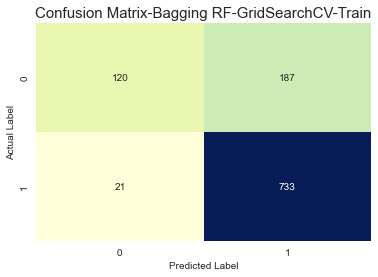

In [270]:
sns.heatmap(confusion_matrix(train_labels, Bagging_RF_pred_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Bagging RF-GridSearchCV-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

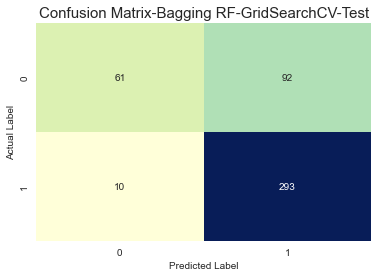

In [271]:
sns.heatmap(confusion_matrix(test_labels, Bagging_RF_pred_test2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Bagging RF-GridSearchCV-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [272]:
bagRF_train_accu2 = best_model5.score(X_train,train_labels)
print("Accuracy score of Bagging RF GridSearchCV Trained data is ",round(bagRF_train_accu2,2))

Accuracy score of Bagging RF GridSearchCV Trained data is  0.8


In [273]:
bagRF_test_accu2 = best_model5.score(X_test,test_labels)
print("Accuracy score of Bagging RF GridSearchCV Tested data is ",round(bagRF_test_accu2,2))

Accuracy score of Bagging RF GridSearchCV Tested data is  0.78


### ROC Curve and AUC Score - Train

AUC Score for Bagging RF GridSearchCV train data: 0.918


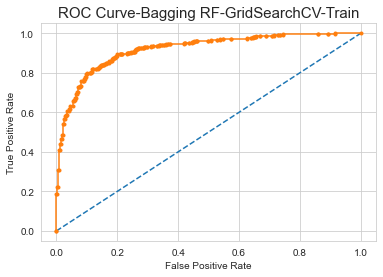

In [274]:
probs = best_model5.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagRF_train_auc2 = roc_auc_score(train_labels, probs)
print('AUC Score for Bagging RF GridSearchCV train data: %.3f' % bagRF_train_auc2)
# calculate roc curve
bagRF_train_fpr2, bagRF_train_tpr2, bagRF_train_thresholds2 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagRF_train_fpr2, bagRF_train_tpr2, marker='.')
plt.title('ROC Curve-Bagging RF-GridSearchCV-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for Bagging RF GridSearchCV test data: 0.881


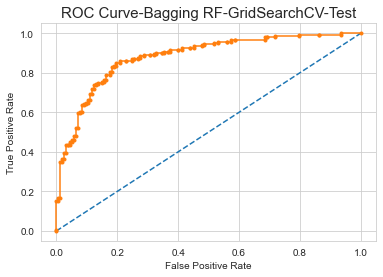

In [275]:
probs = best_model5.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagRF_test_auc2 = roc_auc_score(test_labels, probs)
print('AUC Score for Bagging RF GridSearchCV test data: %.3f' % bagRF_test_auc2)
# calculate roc curve
bagRF_test_fpr2, bagRF_test_tpr2, bagRF_test_thresholds2 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagRF_test_fpr2, bagRF_test_tpr2, marker='.')
plt.title('ROC Curve-Bagging RF-GridSearchCV-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 15- SMOTE Bagging RF Model

### Classification Report -Train Data

In [276]:
print(classification_report(train_labels_res ,Bagging_SM_RF_pred_train))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       754
           1       0.98      0.97      0.97       754

    accuracy                           0.97      1508
   macro avg       0.97      0.97      0.97      1508
weighted avg       0.97      0.97      0.97      1508



In [277]:
bagRF_SM_train_classifRepo = classification_report(train_labels_res,Bagging_SM_RF_pred_train,output_dict=True)
bagRF_SM_train = pd.DataFrame(bagRF_SM_train_classifRepo).transpose()

bagRF_SM_train_precision_conserv = round(bagRF_SM_train.loc["0"][0],2)
bagRF_SM_train_recall_conserv = round(bagRF_SM_train.loc["0"][1],2)
bagRF_SM_train_f1_conserv = round(bagRF_SM_train.loc["0"][2],2)

bagRF_SM_train_precision_labour = round(bagRF_SM_train.loc["1"][0],2)
bagRF_SM_train_recall_labour = round(bagRF_SM_train.loc["1"][1],2)
bagRF_SM_train_f1_labour = round(bagRF_SM_train.loc["1"][2],2)


print ('Bagging RF SMOTE Conservative Train precision :',bagRF_SM_train_precision_conserv)
print ('Bagging RF SMOTE Conservative Train recall : ',bagRF_SM_train_recall_conserv)
print ('Bagging RF SMOTE Conservative Train f1 : ',bagRF_SM_train_f1_conserv)

print ('Bagging RF SMOTE Labour Train precision :',bagRF_SM_train_precision_labour)
print ('Bagging RF SMOTE Labour Train recall : ',bagRF_SM_train_recall_labour)
print ('Bagging RF SMOTE Labour Train f1 : ',bagRF_SM_train_f1_labour)



Bagging RF SMOTE Conservative Train precision : 0.97
Bagging RF SMOTE Conservative Train recall :  0.98
Bagging RF SMOTE Conservative Train f1 :  0.97
Bagging RF SMOTE Labour Train precision : 0.98
Bagging RF SMOTE Labour Train recall :  0.97
Bagging RF SMOTE Labour Train f1 :  0.97


### Classification Report -Test Data

In [278]:
print(classification_report(test_labels,Bagging_SM_RF_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       153
           1       0.87      0.86      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [279]:
bagRF_SM_test_classifRepo = classification_report(test_labels,Bagging_SM_RF_pred_test,output_dict=True)
bagRF_SM_test = pd.DataFrame(bagRF_SM_test_classifRepo).transpose()

bagRF_SM_test_precision_conserv = round(bagRF_SM_test.loc["0"][0],2)
bagRF_SM_test_recall_conserv = round(bagRF_SM_test.loc["0"][1],2)
bagRF_SM_test_f1_conserv = round(bagRF_SM_test.loc["0"][2],2)

bagRF_SM_test_precision_labour = round(bagRF_SM_test.loc["1"][0],2)
bagRF_SM_test_recall_labour = round(bagRF_SM_test.loc["1"][1],2)
bagRF_SM_test_f1_labour = round(bagRF_SM_test.loc["1"][2],2)


print ('Bagging RF SMOTE Conservative Test precision :',bagRF_SM_test_precision_conserv)
print ('Bagging RF SMOTE Conservative Test recall : ',bagRF_SM_test_recall_conserv)
print ('Bagging RF SMOTE Conservative Test f1 : ',bagRF_SM_test_f1_conserv)

print ('Bagging RF SMOTE Labour Test precision :',bagRF_SM_test_precision_labour)
print ('Bagging RF SMOTE Labour Test recall : ',bagRF_SM_test_recall_labour)
print ('Bagging RF SMOTE Labour Test f1 : ',bagRF_SM_test_f1_labour)


Bagging RF SMOTE Conservative Test precision : 0.73
Bagging RF SMOTE Conservative Test recall :  0.75
Bagging RF SMOTE Conservative Test f1 :  0.74
Bagging RF SMOTE Labour Test precision : 0.87
Bagging RF SMOTE Labour Test recall :  0.86
Bagging RF SMOTE Labour Test f1 :  0.87


### Confusion Matrix - Train Data

In [280]:
sns.heatmap(confusion_matrix(train_labels_res, Bagging_SM_RF_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Bagging RF SMOTE-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

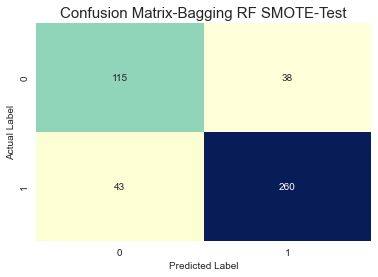

In [281]:
sns.heatmap(confusion_matrix(test_labels, Bagging_SM_RF_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Bagging RF SMOTE-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [282]:
bagRF_SM_train_accu = Bagging_SM_model_RF.score(X_train_res,train_labels_res)
print("Accuracy score of Bagging RF SMOTE Trained data is ",round(bagRF_SM_train_accu,2))

Accuracy score of Bagging RF SMOTE Trained data is  0.97


In [283]:
bagRF_SM_test_accu = Bagging_SM_model_RF.score(X_test,test_labels)
print("Accuracy score of Bagging RF SMOTE Tested data is ",round(bagRF_SM_test_accu,2))

Accuracy score of Bagging RF SMOTE Tested data is  0.82


### ROC Curve and AUC Score - Train

AUC Score for Bagging RF SMOTE train data: 0.998


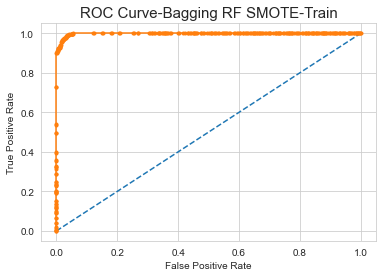

In [284]:
probs = Bagging_SM_model_RF.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagRF_SM_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC Score for Bagging RF SMOTE train data: %.3f' % bagRF_SM_train_auc)
# calculate roc curve
bagRF_SM_train_fpr, bagRF_SM_train_tpr,bagRF_SM_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagRF_SM_train_fpr, bagRF_SM_train_tpr, marker='.')
plt.title('ROC Curve-Bagging RF SMOTE-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for Bagging RF SMOTE test data: 0.886


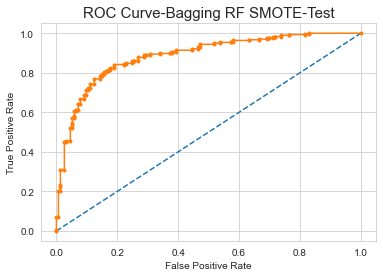

In [285]:
probs = Bagging_SM_model_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagRF_SM_test_auc= roc_auc_score(test_labels, probs)
print('AUC Score for Bagging RF SMOTE test data: %.3f' % bagRF_SM_test_auc)
# calculate roc curve
bagRF_SM_test_fpr, bagRF_SM_test_tpr, bagRF_SM_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagRF_SM_test_fpr, bagRF_SM_test_tpr, marker='.')
plt.title('ROC Curve-Bagging RF SMOTE-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 16 - Basic Gradient Boosting

### Classification Report -Train Data

In [286]:
print(classification_report(train_labels,gbcl_pred_train1))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [287]:
gbcl_train_classifRepo1 = classification_report(train_labels,gbcl_pred_train1,output_dict=True)
gbcl_train1 = pd.DataFrame(gbcl_train_classifRepo1).transpose()

gbcl_train_precision1_conserv = round(gbcl_train1.loc["0"][0],2)
gbcl_train_recall1_conserv = round(gbcl_train1.loc["0"][1],2)
gbcl_train_f1_1_conserv = round(gbcl_train1.loc["0"][2],2)

gbcl_train_precision1_labour = round(gbcl_train1.loc["1"][0],2)
gbcl_train_recall1_labour = round(gbcl_train1.loc["1"][1],2)
gbcl_train_f1_1_labour = round(gbcl_train1.loc["1"][2],2)

print ('GB Labour Train precision :',gbcl_train_precision1_labour)
print ('GB Labour Train recall : ',gbcl_train_recall1_labour)
print ('GB Labour Train f1 : ',gbcl_train_f1_1_labour)

print ('GB Conservative Train precision :',gbcl_train_precision1_conserv)
print ('GB Conservative Train recall : ',gbcl_train_recall1_conserv)
print ('GB Conservative Train f1 : ',gbcl_train_f1_1_conserv)



GB Labour Train precision : 0.9
GB Labour Train recall :  0.94
GB Labour Train f1 :  0.92
GB Conservative Train precision : 0.83
GB Conservative Train recall :  0.74
GB Conservative Train f1 :  0.78


### Classification Report -Test Data

In [288]:
print(classification_report(test_labels,gbcl_pred_test1))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [289]:
gbcl_test_classifRepo1 = classification_report(test_labels,gbcl_pred_test1,output_dict=True)
gbcl_test1 = pd.DataFrame(gbcl_test_classifRepo1).transpose()

gbcl_test_precision1_conserv = round(gbcl_test1.loc["0"][0],2)
gbcl_test_recall1_conserv = round(gbcl_test1.loc["0"][1],2)
gbcl_test_f1_1_conserv = round(gbcl_test1.loc["0"][2],2)


gbcl_test_precision1_labour = round(gbcl_test1.loc["1"][0],2)
gbcl_test_recall1_labour = round(gbcl_test1.loc["1"][1],2)
gbcl_test_f1_1_labour = round(gbcl_test1.loc["1"][2],2)

print ('GB Labour Test precision :',gbcl_test_precision1_labour)
print ('GB Labour Test recall : ',gbcl_test_recall1_labour)
print ('GB Labour Test f1 : ',gbcl_test_f1_1_labour)

print ('GB Conservative Test precision :',gbcl_test_precision1_conserv)
print ('GB Conservative Test recall : ',gbcl_test_recall1_conserv)
print ('GB Conservative Test f1 : ',gbcl_test_f1_1_conserv)



GB Labour Test precision : 0.85
GB Labour Test recall :  0.91
GB Labour Test f1 :  0.88
GB Conservative Test precision : 0.79
GB Conservative Test recall :  0.67
GB Conservative Test f1 :  0.73


### Confusion Matrix - Train Data

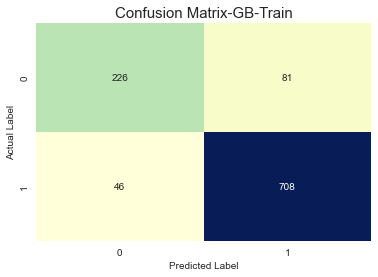

In [290]:
sns.heatmap(confusion_matrix(train_labels, gbcl_pred_train1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GB-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

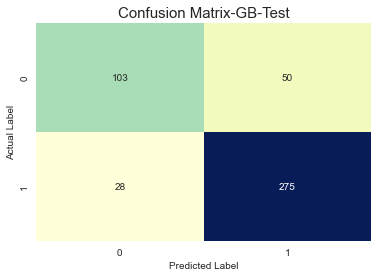

In [291]:
sns.heatmap(confusion_matrix(test_labels, gbcl_pred_test1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GB-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [292]:
gbcl_train_accu1 = gbcl1.score(X_train,train_labels)
print("Accuracy score of GB Trained data is ",round(gbcl_train_accu1,2))

Accuracy score of GB Trained data is  0.88


In [293]:
gbcl_test_accu1 = gbcl1.score(X_test,test_labels)
print("Accuracy score of GB Tested data is ",round(gbcl_test_accu1,2))

Accuracy score of GB Tested data is  0.83


### ROC Curve and AUC Score - Train

AUC Score for GB train data: 0.935


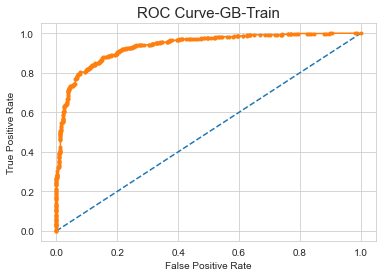

In [294]:
probs = gbcl1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
gbcl_train_auc1 = roc_auc_score(train_labels, probs)
print('AUC Score for GB train data: %.3f' % gbcl_train_auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
gbcl_train_fpr1, gbcl_train_tpr1, gbcl_train_thresholds1 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr1, gbcl_train_tpr1, marker='.')
plt.title('ROC Curve-GB-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for GB test data: 0.897


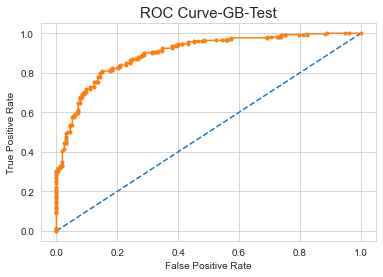

In [295]:
probs = gbcl1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
gbcl_test_auc1 = roc_auc_score(test_labels, probs)
print('AUC Score for GB test data: %.3f' % gbcl_test_auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
gbcl_test_fpr1, gbcl_test_tpr1, gbcl_test_thresholds1 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr1, gbcl_test_tpr1, marker='.')
plt.title('ROC Curve-GB-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 17- GridSeacrhCV Gradient Boosting Model

### Classification Report -Train Data

In [296]:
print(classification_report(train_labels,gbcl_pred_train2))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       307
           1       0.87      0.94      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.86      0.86      0.85      1061



In [297]:
gbcl_train_classifRepo2 = classification_report(train_labels,gbcl_pred_train2,output_dict=True)
gbcl_train2 = pd.DataFrame(gbcl_train_classifRepo2).transpose()

gbcl_train_precision2_conserv = round(gbcl_train2.loc["0"][0],2)
gbcl_train_recall2_conserv = round(gbcl_train2.loc["0"][1],2)
gbcl_train_f1_2_conserv = round(gbcl_train2.loc["0"][2],2)

gbcl_train_precision2_labour = round(gbcl_train2.loc["1"][0],2)
gbcl_train_recall2_labour = round(gbcl_train2.loc["1"][1],2)
gbcl_train_f1_2_labour = round(gbcl_train2.loc["1"][2],2)

print ('GB GridSearchCV Conservative Train precision :',gbcl_train_precision2_conserv)
print ('GB GridSearchCV Conservative Train recall : ',gbcl_train_recall2_conserv)
print ('GB GridSearchCV Conservative Train f1 : ',gbcl_train_f1_2_conserv)

print ('GB GridSearchCV Labour Train precision :',gbcl_train_precision2_labour)
print ('GB GridSearchCV Labour Train recall : ',gbcl_train_recall2_labour)
print ('GB GridSearchCV Labour Train f1 : ',gbcl_train_f1_2_labour)


GB GridSearchCV Conservative Train precision : 0.81
GB GridSearchCV Conservative Train recall :  0.67
GB GridSearchCV Conservative Train f1 :  0.73
GB GridSearchCV Labour Train precision : 0.87
GB GridSearchCV Labour Train recall :  0.94
GB GridSearchCV Labour Train f1 :  0.9


### Classification Report -Test Data

In [298]:
print(classification_report(test_labels,gbcl_pred_test2))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       153
           1       0.83      0.94      0.88       303

    accuracy                           0.84       456
   macro avg       0.84      0.78      0.80       456
weighted avg       0.84      0.84      0.83       456



In [299]:
gbcl_test_classifRepo2 = classification_report(test_labels,gbcl_pred_test2,output_dict=True)
gbcl_test2 = pd.DataFrame(gbcl_test_classifRepo2).transpose()

gbcl_test_precision2_conserv = round(gbcl_test2.loc["0"][0],2)
gbcl_test_recall2_conserv = round(gbcl_test2.loc["0"][1],2)
gbcl_test_f1_2_conserv = round(gbcl_test2.loc["0"][2],2)

gbcl_test_precision2_labour = round(gbcl_test2.loc["1"][0],2)
gbcl_test_recall2_labour = round(gbcl_test2.loc["1"][1],2)
gbcl_test_f1_2_labour = round(gbcl_test2.loc["1"][2],2)

print ('GB GridSearchCV Conservative Test precision :',gbcl_test_precision2_conserv)
print ('GB GridSearchCV Conservative Test recall : ',gbcl_test_recall2_conserv)
print ('GB GridSearchCV Conservative Test f1 : ',gbcl_test_f1_2_conserv)

print ('GB GridSearchCV Labour Test precision :',gbcl_test_precision2_labour)
print ('GB GridSearchCV Labour Test recall : ',gbcl_test_recall2_labour)
print ('GB GridSearchCV Labour Test f1 : ',gbcl_test_f1_2_labour)


GB GridSearchCV Conservative Test precision : 0.84
GB GridSearchCV Conservative Test recall :  0.63
GB GridSearchCV Conservative Test f1 :  0.72
GB GridSearchCV Labour Test precision : 0.83
GB GridSearchCV Labour Test recall :  0.94
GB GridSearchCV Labour Test f1 :  0.88


### Confusion Matrix - Train Data

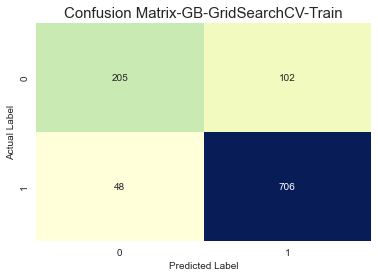

In [300]:
sns.heatmap(confusion_matrix(train_labels, gbcl_pred_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GB-GridSearchCV-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

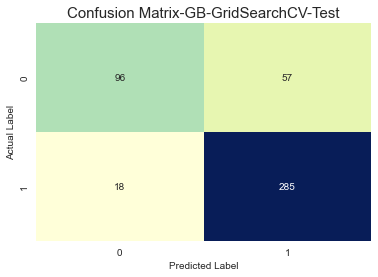

In [301]:
sns.heatmap(confusion_matrix(test_labels, gbcl_pred_test2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GB-GridSearchCV-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [302]:
gbcl_train_accu2 = best_model6.score(X_train,train_labels)
print("Accuracy score of GB GridSearchCV Trained data is ",round(gbcl_train_accu2,2))

Accuracy score of GB GridSearchCV Trained data is  0.86


In [303]:
gbcl_test_accu2 = best_model6.score(X_test,test_labels)
print("Accuracy score of GB GridSearchCV Tested data is ",round(gbcl_test_accu2,2))

Accuracy score of GB GridSearchCV Tested data is  0.84


### ROC Curve and AUC Score - Train

AUC Score for GB GridSearchCV train data: 0.918


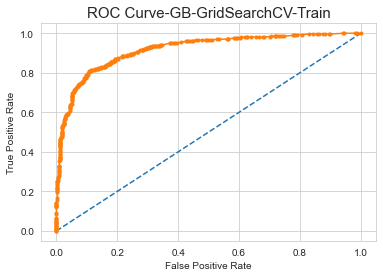

In [304]:
probs = best_model6.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc2 = roc_auc_score(train_labels, probs)
print('AUC Score for GB GridSearchCV train data: %.3f' % gbcl_train_auc2)
# calculate roc curve
gbcl_train_fpr2, gbcl_train_tpr2, gbcl_train_thresholds2 = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr2, gbcl_train_tpr2, marker='.')
plt.title('ROC Curve-GB-GridSearchCV-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for GB GridSearchCV test data: 0.897


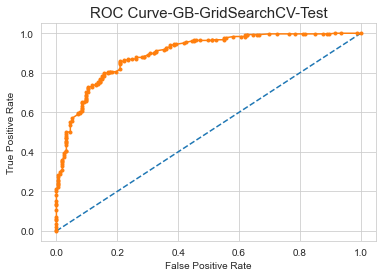

In [305]:
probs = best_model6.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc2 = roc_auc_score(test_labels, probs)
print('AUC Score for GB GridSearchCV test data: %.3f' % gbcl_test_auc2)
# calculate roc curve
gbcl_test_fpr2, gbcl_test_tpr2, gbcl_test_thresholds2 = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr2, gbcl_test_tpr2, marker='.')
plt.title('ROC Curve-GB-GridSearchCV-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 18- SMOTE Gradient Boosting Model

### Classification Report -Train Data

In [306]:
print(classification_report(train_labels_res,gbcl_SM_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       754
           1       0.93      0.88      0.90       754

    accuracy                           0.91      1508
   macro avg       0.91      0.91      0.91      1508
weighted avg       0.91      0.91      0.91      1508



In [307]:
GB_SM_train_classifRepo = classification_report(train_labels_res,gbcl_SM_pred_train,output_dict=True)
GB_SM_train = pd.DataFrame(GB_SM_train_classifRepo).transpose()

GB_SM_train_precision_conserv = round(GB_SM_train.loc["0"][0],2)
GB_SM_train_recall_conserv = round(GB_SM_train.loc["0"][1],2)
GB_SM_train_f1_conserv = round(GB_SM_train.loc["0"][2],2)

GB_SM_train_precision_labour = round(GB_SM_train.loc["1"][0],2)
GB_SM_train_recall_labour = round(GB_SM_train.loc["1"][1],2)
GB_SM_train_f1_labour = round(GB_SM_train.loc["1"][2],2)


print ('GB SMOTE Conservative Train precision :',GB_SM_train_precision_conserv)
print ('GB SMOTE Conservative Train recall : ',GB_SM_train_recall_conserv)
print ('GB SMOTE Conservative Train f1 : ',GB_SM_train_f1_conserv)

print ('GB SMOTE Labour Train precision :',GB_SM_train_precision_labour)
print ('GB SMOTE Labour Train recall : ',GB_SM_train_recall_labour)
print ('GB SMOTE Labour Train f1 : ',GB_SM_train_f1_labour)



GB SMOTE Conservative Train precision : 0.89
GB SMOTE Conservative Train recall :  0.93
GB SMOTE Conservative Train f1 :  0.91
GB SMOTE Labour Train precision : 0.93
GB SMOTE Labour Train recall :  0.88
GB SMOTE Labour Train f1 :  0.9


### Classification Report -Test Data

In [308]:
print(classification_report(test_labels,gbcl_SM_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       153
           1       0.89      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.83      0.82      0.83       456



In [309]:
GB_SM_test_classifRepo = classification_report(test_labels,gbcl_SM_pred_test,output_dict=True)
GB_SM_test = pd.DataFrame(GB_SM_test_classifRepo).transpose()

GB_SM_test_precision_conserv = round(GB_SM_test.loc["0"][0],2)
GB_SM_test_recall_conserv = round(GB_SM_test.loc["0"][1],2)
GB_SM_test_f1_conserv = round(GB_SM_test.loc["0"][2],2)

GB_SM_test_precision_labour = round(GB_SM_test.loc["1"][0],2)
GB_SM_test_recall_labour = round(GB_SM_test.loc["1"][1],2)
GB_SM_test_f1_labour = round(GB_SM_test.loc["1"][2],2)


print ('GB SMOTE Conservative Test precision :',GB_SM_test_precision_conserv)
print ('GB SMOTE Conservative Test recall : ',GB_SM_test_recall_conserv)
print ('GB SMOTE Conservative Test f1 : ',GB_SM_test_f1_conserv)

print ('GB SMOTE Labour Test precision :',GB_SM_test_precision_labour)
print ('GB SMOTE Labour Test recall : ',GB_SM_test_recall_labour)
print ('GB SMOTE Labour Test f1 : ',GB_SM_test_f1_labour)


GB SMOTE Conservative Test precision : 0.72
GB SMOTE Conservative Test recall :  0.79
GB SMOTE Conservative Test f1 :  0.75
GB SMOTE Labour Test precision : 0.89
GB SMOTE Labour Test recall :  0.84
GB SMOTE Labour Test f1 :  0.86


### Confusion Matrix - Train Data

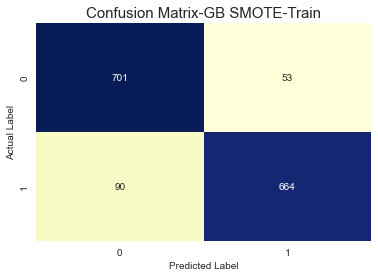

In [310]:
sns.heatmap(confusion_matrix(train_labels_res, gbcl_SM_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GB SMOTE-Train',fontsize=15)
plt.show();


### Confusion Matrix - Test Data

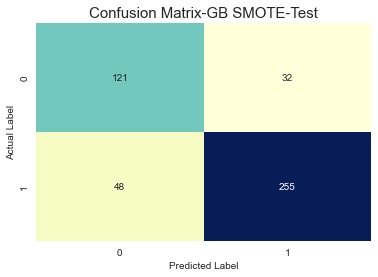

In [311]:
sns.heatmap(confusion_matrix(test_labels, gbcl_SM_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-GB SMOTE-Test',fontsize=15)
plt.show();


### Accuracy Score- Train and Test

In [312]:
GB_SM_train_accu = gbcl_SM_model.score(X_train_res,train_labels_res)
print("Accuracy score of GB SMOTE Trained data is ",round(GB_SM_train_accu,2))

Accuracy score of GB SMOTE Trained data is  0.91


In [313]:
GB_SM_test_accu = gbcl_SM_model.score(X_test,test_labels)
print("Accuracy score of GB SMOTE Tested data is ",round(GB_SM_test_accu,2))

Accuracy score of GB SMOTE Tested data is  0.82


### ROC Curve and AUC Score - Train

AUC Score for GB SMOTE train data: 0.962


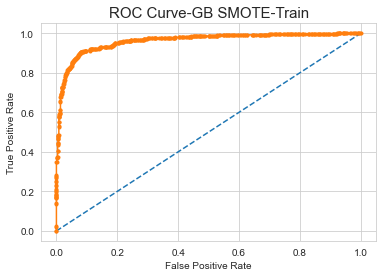

In [314]:
probs = gbcl_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GB_SM_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC Score for GB SMOTE train data: %.3f' % GB_SM_train_auc)
# calculate roc curve
GB_SM_train_fpr, GB_SM_train_tpr,GB_SM_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_SM_train_fpr, GB_SM_train_tpr, marker='.')
plt.title('ROC Curve-GB SMOTE-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### ROC Curve and AUC Score - Test

AUC Score for GB SMOTE test data: 0.886


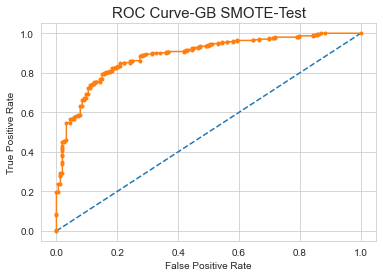

In [315]:
probs = gbcl_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
GB_SM_test_auc= roc_auc_score(test_labels, probs)
print('AUC Score for GB SMOTE test data: %.3f' % GB_SM_test_auc)
# calculate roc curve
GB_SM_test_fpr, GB_SM_test_tpr, GB_SM_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_SM_test_fpr, GB_SM_test_tpr, marker='.')
plt.title('ROC Curve-GB SMOTE-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Comparison of the models

In [316]:
index1=['Accuracy', 'AUC', 'Recall_Labour','Recall_Conservative','Precision_Labour','Precision_Conservative','F1 Score_Labour','F1 Score_Conservative']
data1 = pd.DataFrame({'Basic LogReg Train':[log_train_accu1,log_train_auc1,log_train_recall1_labour,log_train_recall1_conserv,log_train_precision1_labour,log_train_precision1_conserv,log_train_f1_1_labour,log_train_f1_1_conserv],
        'Basic LogReg Test':[log_test_accu1,log_test_auc1,log_test_recall1_labour,log_test_recall1_conserv,log_test_precision1_labour,log_test_precision1_conserv,log_test_f1_1_labour,log_test_f1_1_conserv],
       'GridSearchCV LogReg Train':[log_train_accu2,log_train_auc2,log_train_recall2_labour,log_train_recall2_conserv,log_train_precision2_labour,log_train_precision2_conserv,log_train_f1_2_labour,log_train_f1_2_conserv],
       'GridSearchCV LogReg Test':[log_test_accu2,log_test_auc2,log_test_recall2_labour ,log_test_recall2_conserv ,log_test_precision2_labour,log_test_precision2_conserv  ,log_test_f1_2_labour , log_test_f1_2_conserv  ],
       'SMOTE LogReg Train ':[log_train_accuSM,log_train_aucSM,log_SM_train_recall_labour,log_SM_train_recall_conserv,log_SM_train_precision_labour,log_SM_train_precision_conserv,log_SM_train_f1_labour,log_SM_train_f1_conserv],
       'SMOTE LogReg Test ':[log_test_accuSM,log_test_aucSM,log_SM_test_recall_labour,log_SM_test_recall_conserv,log_SM_test_precision_labour ,log_SM_test_precision_conserv,log_SM_test_f1_labour,log_SM_test_f1_conserv],
        'Basic LDA Train':[lda_train_accu1,lda_train_auc1,lda_train_recall1_labour,lda_train_recall1_conserv, lda_train_precision1_labour  ,lda_train_precision1_conserv,lda_train_f1_1_labour ,lda_train_f1_1_conserv ],
       'Basic LDA Test':[lda_test_accu1,lda_test_auc1,lda_test_recall1_labour,lda_test_recall1_conserv,lda_test_precision1_labour ,lda_test_precision1_conserv ,lda_test_f1_1_labour ,lda_test_f1_1_conserv ],
       'GridSearchCV LDA Train':[lda_train_accu2,lda_train_auc2,lda_train_recall2_labour ,lda_train_recall2_conserv ,lda_train_precision2_labour ,lda_train_precision2_conserv ,lda_train_f1_2_labour ,lda_train_f1_2_conserv ],
       'GridSearchCV LDA Test':[lda_test_accu2,lda_test_auc2,lda_test_recall2_labour ,lda_test_recall2_conserv ,lda_test_precision2_labour ,lda_test_precision2_conserv ,lda_test_f1_2_labour ,lda_test_f1_2_conserv ],
       'SMOTE LDA Train ':[lda_train_accuSM,lda_train_aucSM,lda_SM_train_recall_labour,lda_SM_train_recall_conserv,lda_SM_train_precision_labour,lda_SM_train_precision_conserv,lda_SM_train_f1_labour,lda_SM_train_f1_conserv ],
        'SMOTE LDA Test ':[lda_test_accuSM,lda_test_aucSM,lda_SM_test_recall_labour,lda_SM_test_recall_conserv,lda_SM_test_precision_labour,lda_SM_test_precision_conserv,lda_SM_test_f1_labour,lda_SM_test_f1_conserv] },index=index1)

round(data1,2)


Basic LogReg Train  Basic LogReg Test  \
Accuracy                              0.84               0.82   
AUC                                   0.89               0.88   
Recall_Labour                         0.91               0.88   
Recall_Conservative                   0.65               0.72   
Precision_Labour                      0.86               0.86   
Precision_Conservative                0.75               0.75   
F1 Score_Labour                       0.89               0.87   
F1 Score_Conservative                 0.69               0.73   

                        GridSearchCV LogReg Train  GridSearchCV LogReg Test  \
Accuracy                                     0.83                      0.83   
AUC                                          0.89                      0.88   
Recall_Labour                                0.92                      0.88   
Recall_Conservative                          0.63                      0.72   
Precision_Labour                             0.86                      0.86   
Precision_Conservative                       0.76                      0.75   
F1 Score_Labour                              0.89                      0.87   
F1 Score_Conservative                        0.69                      0.73   

                        SMOTE LogReg Train   SMOTE LogReg Test   \
Accuracy                               0.84                0.80   
AUC                                    0.91                0.87   
Recall_Labour                          0.83                0.80   
Recall_Conservative                    0.85                0.80   
Precision_Labour                       0.85                0.89   
Precision_Conservative                 0.83                0.66   
F1 Score_Labour                        0.84                0.84   
F1 Score_Conservative                  0.84                0.73   

                        Basic LDA Train  Basic LDA Test  \
Accuracy                           0.83            0.83   
AUC                                0.89            0.89   
Recall_Labour                      0.91            0.89   
Recall_Conservative                0.65            0.73   
Precision_Labour                   0.86            0.86   
Precision_Conservative             0.74            0.77   
F1 Score_Labour                    0.89            0.88   
F1 Score_Conservative              0.69            0.74   

                        GridSearchCV LDA Train  GridSearchCV LDA Test  \
Accuracy                                  0.83                   0.83   
AUC                                       0.89                   0.89   
Recall_Labour                             0.91                   0.89   
Recall_Conservative                       0.65                   0.73   
Precision_Labour                          0.86                   0.86   
Precision_Conservative                    0.74                   0.77   
F1 Score_Labour                           0.89                   0.88   
F1 Score_Conservative                     0.69                   0.74   

                        SMOTE LDA Train   SMOTE LDA Test   
Accuracy                            0.84             0.81  
AUC                                 0.91             0.87  
Recall_Labour                       0.83             0.80  
Recall_Conservative                 0.85             0.83  
Precision_Labour                    0.85             0.90  
Precision_Conservative              0.84             0.68  
F1 Score_Labour                     0.84             0.85  
F1 Score_Conservative               0.84             0.74

In [328]:
data2 = pd.DataFrame({'Basic KNN Train':[knn_train_accu1,knn_train_auc1,knn_train_recall1_labour ,knn_train_recall1_conserv,knn_train_precision1_labour ,knn_train_precision1_conserv ,knn_train_f1_1_labour , knn_train_f1_1_conserv ],              
       'Basic KNN Test':[knn_test_accu1,knn_test_auc1,knn_test_recall1_labour ,knn_test_recall1_conserv,knn_test_precision1_labour ,knn_test_precision1_conserv ,knn_test_f1_1_labour , knn_test_f1_1_conserv ],               
       'GridSearchCV KNN Train':[knn_train_accu2,knn_train_auc2,knn_train_recall2_labour ,knn_train_recall2_conserv,knn_train_precision2_labour ,knn_train_precision2_conserv ,knn_train_f1_2_labour , knn_train_f1_2_conserv ],              
       'GridSearchCV KNN Test':[knn_test_accu2,knn_test_auc2,knn_test_recall2_labour ,knn_test_recall2_conserv,knn_test_precision2_labour ,knn_test_precision2_conserv ,knn_test_f1_2_labour , knn_test_f1_2_conserv ],
       'SMOTE KNN Train':[knn_train_accuSM,knn_train_aucSM,knn_SM_train_recall_labour,knn_SM_train_recall_conserv,knn_SM_train_precision_labour,knn_SM_train_precision_conserv,knn_SM_train_f1_labour,knn_SM_train_f1_conserv],
        'SMOTE KNN Test':[knn_test_accuSM,knn_test_aucSM,knn_SM_test_recall_labour,knn_SM_test_recall_conserv,knn_SM_test_precision_labour,knn_SM_test_precision_conserv,knn_SM_test_f1_labour,knn_SM_test_f1_conserv],
        'Basic GNB Train':[GNB_train_accu1,GNB_train_auc1,GNB_train_recall1_labour ,GNB_train_recall1_conserv ,GNB_train_precision1_labour ,GNB_train_precision1_conserv ,GNB_train_f1_1_labour ,GNB_train_f1_1_conserv ],
        'Basic GNB Test':[GNB_test_accu1,GNB_test_auc1,GNB_test_recall1_labour ,GNB_test_recall1_conserv ,GNB_test_precision1_labour ,GNB_test_precision1_conserv ,GNB_test_f1_1_labour ,GNB_test_f1_1_conserv ],
        'GridSearchCV GNB Train':[GNB_train_accu2,GNB_train_auc2,GNB_train_recall2_labour ,GNB_train_recall2_conserv ,GNB_train_precision2_labour ,GNB_train_precision2_conserv ,GNB_train_f1_2_labour ,GNB_train_f1_2_conserv ],
        'GridSearchCV GNB Test':[GNB_test_accu2,GNB_test_auc2,GNB_test_recall2_labour ,GNB_test_recall2_conserv ,GNB_test_precision2_labour ,GNB_test_precision2_conserv ,GNB_test_f1_2_labour ,GNB_test_f1_2_conserv ],
        'SMOTE GNB Train':[GNB_SM_train_accu,GNB_SM_train_auc,GNB_SM_train_recall_labour,GNB_SM_train_recall_conserv,GNB_SM_train_precision_labour,GNB_SM_train_precision_conserv,GNB_SM_train_f1_labour,GNB_SM_train_f1_conserv],
        'SMOTE GNB Test':[GNB_SM_test_accu,GNB_SM_test_auc,GNB_SM_test_recall_labour ,GNB_SM_test_recall_conserv,GNB_SM_test_precision_labour,GNB_SM_test_precision_conserv,GNB_SM_test_f1_labour ,GNB_SM_test_f1_conserv] },index=index1)
   
round(data2,2)


Basic KNN Train  Basic KNN Test  \
Accuracy                           0.85            0.83   
AUC                                0.93            0.87   
Recall_Labour                      0.91            0.90   
Recall_Conservative                0.71            0.68   
Precision_Labour                   0.88            0.85   
Precision_Conservative             0.77            0.78   
F1 Score_Labour                    0.90            0.87   
F1 Score_Conservative              0.74            0.72   

                        GridSearchCV KNN Train  GridSearchCV KNN Test  \
Accuracy                                   1.0                   0.82   
AUC                                        1.0                   0.89   
Recall_Labour                              1.0                   0.91   
Recall_Conservative                        1.0                   0.65   
Precision_Labour                           1.0                   0.84   
Precision_Conservative                     1.0                   0.79   
F1 Score_Labour                            1.0                   0.87   
F1 Score_Conservative                      1.0                   0.71   

                        SMOTE KNN Train  SMOTE KNN Test  Basic GNB Train  \
Accuracy                           0.88            0.79             0.84   
AUC                                0.96            0.87             0.89   
Recall_Labour                      0.83            0.77             0.90   
Recall_Conservative                0.94            0.81             0.69   
Precision_Labour                   0.93            0.89             0.88   
Precision_Conservative             0.85            0.64             0.73   
F1 Score_Labour                    0.88            0.83             0.89   
F1 Score_Conservative              0.89            0.72             0.71   

                        Basic GNB Test  GridSearchCV GNB Train  \
Accuracy                          0.82                    0.84   
AUC                               0.88                    0.89   
Recall_Labour                     0.87                    0.90   
Recall_Conservative               0.73                    0.69   
Precision_Labour                  0.87                    0.88   
Precision_Conservative            0.74                    0.73   
F1 Score_Labour                   0.87                    0.89   
F1 Score_Conservative             0.73                    0.71   

                        GridSearchCV GNB Test  SMOTE GNB Train  SMOTE GNB Test  
Accuracy                                 0.82             0.84            0.80  
AUC                                      0.88             0.91            0.86  
Recall_Labour                            0.87             0.84            0.82  
Recall_Conservative                      0.73             0.84            0.77  
Precision_Labour                         0.87             0.84            0.88  
Precision_Conservative                   0.74             0.84            0.68  
F1 Score_Labour                          0.87             0.84            0.84  
F1 Score_Conservative                    0.74             0.84            0.72

In [326]:
data3 = pd.DataFrame({'Basic Bagging RF Train':[bagRF_train_accu1,bagRF_train_auc1,bagRF_train_recall1_labour , bagRF_train_recall1_conserv , bagRF_train_precision1_labour , bagRF_train_precision1_conserv ,bagRF_train_f1_1_labour , bagRF_train_f1_1_conserv ],
        'Basic Bagging RF Test':[bagRF_test_accu1,bagRF_test_auc1,bagRF_test_recall1_labour, bagRF_test_recall1_conserv ,bagRF_test_precision1_labour , bagRF_test_precision1_conserv ,bagRF_test_f1_1_labour ,bagRF_test_f1_1_conserv ],
        'GridSearchCV Bagging RF Train':[bagRF_train_accu2,bagRF_train_auc2,bagRF_train_recall2_labour,bagRF_train_recall2_conserv,bagRF_train_precision2_labour,bagRF_train_precision2_conserv,bagRF_train_f1_2_labour,bagRF_train_f1_2_conserv],
        'GridSearchCV Bagging RF Test':[bagRF_test_accu2,bagRF_test_auc2,bagRF_train_f1_2_labour,bagRF_train_f1_2_conserv,bagRF_train_precision2_labour,bagRF_train_precision2_conserv,bagRF_train_f1_2_labour,bagRF_train_f1_2_conserv ],
        'SMOTE Bagging RF Train':[bagRF_SM_train_accu,bagRF_SM_train_auc,bagRF_SM_train_recall_labour ,bagRF_SM_train_recall_conserv,bagRF_SM_train_precision_labour,bagRF_SM_train_precision_conserv,bagRF_SM_train_f1_labour ,bagRF_SM_train_f1_conserv],
        'SMOTE Bagging RF Test':[bagRF_SM_test_accu,bagRF_SM_test_auc,bagRF_SM_test_recall_labour ,bagRF_SM_test_recall_conserv,bagRF_SM_test_precision_labour,bagRF_SM_test_precision_conserv,bagRF_SM_test_f1_labour ,bagRF_SM_test_f1_conserv],
        'Basic GB Train':[gbcl_train_accu1,gbcl_train_auc1,gbcl_train_recall1_labour ,gbcl_train_recall1_conserv ,gbcl_train_precision1_labour ,gbcl_train_precision1_conserv ,gbcl_train_f1_1_labour ,gbcl_train_f1_1_conserv ],  
        'Basic GB Test':[gbcl_test_accu1,gbcl_test_auc1,gbcl_test_recall1_labour ,gbcl_test_recall1_conserv ,gbcl_test_precision1_labour,gbcl_test_precision1_conserv ,gbcl_test_f1_1_labour ,gbcl_test_f1_1_conserv ],
        'GridSearchCV GB Train':[gbcl_train_accu2,gbcl_train_auc2,gbcl_train_recall2_labour,gbcl_train_recall2_conserv,gbcl_train_precision2_labour ,gbcl_train_precision2_conserv,gbcl_train_f1_2_labour,gbcl_train_f1_2_conserv ],
        'GridSearchCV GB Test':[gbcl_test_accu2,gbcl_test_auc2,gbcl_test_recall2_labour,gbcl_test_recall2_conserv ,gbcl_test_precision2_labour,gbcl_test_precision2_conserv ,gbcl_test_f1_2_labour,gbcl_test_f1_2_conserv],
        'SMOTE GB Train':[GB_SM_train_accu,GB_SM_train_auc,GB_SM_train_recall_labour ,GB_SM_train_recall_conserv,GB_SM_train_precision_labour ,GB_SM_train_precision_conserv,GB_SM_train_f1_labour ,GB_SM_train_f1_conserv],
        'SMOTE GB Test':[GB_SM_test_accu,GB_SM_test_auc,GB_SM_test_recall_labour,GB_SM_test_recall_conserv,GB_SM_test_precision_labour,GB_SM_test_precision_conserv,GB_SM_test_f1_labour,GB_SM_test_f1_conserv]},index=index1)
                  
round(data3,2)


Basic Bagging RF Train  Basic Bagging RF Test  \
Accuracy                                  0.97                   0.83   
AUC                                       1.00                   0.90   
Recall_Labour                             0.99                   0.90   
Recall_Conservative                       0.90                   0.68   
Precision_Labour                          0.96                   0.85   
Precision_Conservative                    0.99                   0.78   
F1 Score_Labour                           0.98                   0.88   
F1 Score_Conservative                     0.94                   0.73   

                        GridSearchCV Bagging RF Train  \
Accuracy                                         0.80   
AUC                                              0.92   
Recall_Labour                                    0.97   
Recall_Conservative                              0.39   
Precision_Labour                                 0.80   
Precision_Conservative                           0.85   
F1 Score_Labour                                  0.88   
F1 Score_Conservative                            0.54   

                        GridSearchCV Bagging RF Test  SMOTE Bagging RF Train  \
Accuracy                                        0.78                    0.97   
AUC                                             0.88                    1.00   
Recall_Labour                                   0.88                    0.97   
Recall_Conservative                             0.54                    0.98   
Precision_Labour                                0.80                    0.98   
Precision_Conservative                          0.85                    0.97   
F1 Score_Labour                                 0.88                    0.97   
F1 Score_Conservative                           0.54                    0.97   

                        SMOTE Bagging RF Test  Basic GB Train  Basic GB Test  \
Accuracy                                 0.82            0.88           0.83   
AUC                                      0.89            0.94           0.90   
Recall_Labour                            0.86            0.94           0.91   
Recall_Conservative                      0.75            0.74           0.67   
Precision_Labour                         0.87            0.90           0.85   
Precision_Conservative                   0.73            0.83           0.79   
F1 Score_Labour                          0.87            0.92           0.88   
F1 Score_Conservative                    0.74            0.78           0.73   

                        GridSearchCV GB Train  GridSearchCV GB Test  \
Accuracy                                 0.86                  0.84   
AUC                                      0.92                  0.90   
Recall_Labour                            0.94                  0.94   
Recall_Conservative                      0.67                  0.63   
Precision_Labour                         0.87                  0.83   
Precision_Conservative                   0.81                  0.84   
F1 Score_Labour                          0.90                  0.88   
F1 Score_Conservative                    0.73                  0.72   

                        SMOTE GB Train  SMOTE GB Test  
Accuracy                          0.91           0.82  
AUC                               0.96           0.89  
Recall_Labour                     0.88           0.84  
Recall_Conservative               0.93           0.79  
Precision_Labour                  0.93           0.89  
Precision_Conservative            0.89           0.72  
F1 Score_Labour                   0.90           0.86  
F1 Score_Conservative             0.91           0.75

The best model among basic and Gridsearchcv models are found on the basis of F1 score as they are done based on unbalanced data. The best one is GridsearchCV LDA.

The best model among SMOTE is determined on the basis of accuracy as they are done based on balanced data. The best one is SMOTE LDA.

Hence LDA is the best model.


## 1.8 Based on these predictions, what are the insights?



### Business Insights:

-> Most of the voters assessed the ratings of economic conditions and household conditions as good favouring to ‘Labour’ Party.

-> Most people having Eurosceptic sentiment favour Conservative property.

-> People older than 55 mostly favour Conservative party.

-> The number of females who has given a high score to national economic conditions is less than males.

-> More females are Eurosceptic than males.

-> The number of females who has given a low score to household economic conditions is higher than males.


### Recommendations:

->Based on the sentiments of people like Eurosceptic sentiment the election campaign of a political party must be planned.

-> More data like whether the leader has faced any scandals in the past,manifesto of the parties can be collected to build better models.

-> Within a district voters belonging to different communites,groups can have reasons to vote for a particular party which can be studied.It plays a major role in vote swing(people would vote for a different party in the next election).

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973


In [329]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
from nltk.corpus import inaugural
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import json
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [330]:
roose_raw=inaugural.raw('1941-Roosevelt.txt')
roose_raw

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [331]:
kenn_raw=inaugural.raw('1961-Kennedy.txt')
kenn_raw

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [332]:
nixon_raw=inaugural.raw('1973-Nixon.txt')
nixon_raw

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [333]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  
1941-Roosevelt  On each national day of inauguration since 178...  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

## 2.1 Find the number of characters, words, and sentences for the mentioned documents. 



### Count of words, Characters and Sentences

In [334]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))

inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

In [335]:
plt.figure(figsize=(8,8))
sns.barplot(y='word_count', x='president', data=inaugural_speech)
plt.title('Word count of speeches',fontsize=15);

In [336]:
plt.figure(figsize=(8,8))
sns.barplot(y='char_count', x='president', data=inaugural_speech)
plt.title('Character count of speeches',fontsize=15);

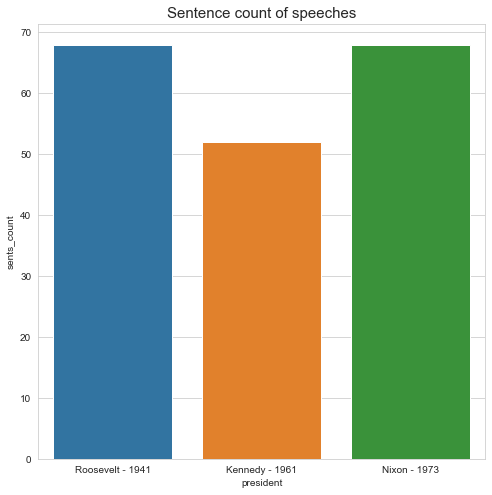

In [337]:
plt.figure(figsize=(8,8))
sns.barplot(y='sents_count', x='president', data=inaugural_speech)
plt.title('Sentence count of speeches',fontsize=15);

## 2.2 Remove all the stopwords from all three speeches.



### Word count before removing stopwords

In [338]:
inaugural_speech['word_count']

1941-Roosevelt    1323
1961-Kennedy      1364
1973-Nixon        1769
Name: word_count, dtype: int64

### Converting to Lowercase

In [339]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']


1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

### Removal of Stopwords and punctuations

In [340]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--", "dear", "im", "i'm","yet","please","let","us","because","know","make","unless","something",'may','still','though'])

In [341]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
inaugural_speech['text']


1941-Roosevelt    national day inauguration since 1789, people r...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

### Word count after removing stopwords

In [342]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech['word_count']

1941-Roosevelt    615
1961-Kennedy      668
1973-Nixon        786
Name: word_count, dtype: int64

### Stopwords in Roosevelt's speech

In [343]:
all_words_roose = [x for x in pd.Series(roose_raw.split())] 
stopwords_roose = [word for word in all_words_roose if word in stopwords]
stopwords_roose

['each',
 'of',
 'the',
 'have',
 'their',
 'of',
 'to',
 'the',
 'the',
 'of',
 'the',
 'was',
 'to',
 'and',
 'a',
 'the',
 'of',
 'the',
 'was',
 'to',
 'that',
 'from',
 'from',
 'this',
 'the',
 'of',
 'the',
 'is',
 'to',
 'that',
 'and',
 'its',
 'from',
 'from',
 'us',
 'there',
 'has',
 'a',
 'in',
 'the',
 'of',
 'to',
 'for',
 'a',
 'and',
 '--',
 'to',
 'what',
 'our',
 'in',
 'has',
 'and',
 'to',
 'what',
 'we',
 'are',
 'and',
 'what',
 'we',
 'may',
 'we',
 'do',
 'we',
 'the',
 'of',
 'of',
 'are',
 'not',
 'by',
 'the',
 'of',
 'but',
 'by',
 'the',
 'of',
 'the',
 'of',
 'a',
 'is',
 'and',
 'a',
 'a',
 'of',
 'a',
 'is',
 'the',
 'of',
 'the',
 'of',
 'its',
 'will',
 'to',
 'are',
 'who',
 'are',
 'who',
 'that',
 'as',
 'a',
 'of',
 'and',
 'a',
 'of',
 'is',
 'or',
 'by',
 'a',
 'of',
 'and',
 'for',
 'some',
 'and',
 'have',
 'the',
 'of',
 'the',
 '--',
 'and',
 'that',
 'is',
 'an',
 'we',
 'know',
 'that',
 'this',
 'is',
 'not',
 'when',
 'the',
 'of',
 'thi

### Stopwords in Kennedy's speech

In [344]:
all_words_kenn = [x for x in pd.Series(kenn_raw.split())] 
stopwords_kenn = [word for word in all_words_kenn if word in stopwords]
stopwords_kenn

['we',
 'not',
 'a',
 'of',
 'but',
 'a',
 'of',
 '--',
 'an',
 'as',
 'as',
 'a',
 '--',
 'as',
 'as',
 'have',
 'before',
 'you',
 'and',
 'the',
 'same',
 'our',
 'a',
 'and',
 'is',
 'very',
 'in',
 'his',
 'the',
 'to',
 'all',
 'of',
 'and',
 'all',
 'of',
 'yet',
 'the',
 'same',
 'for',
 'which',
 'our',
 'are',
 'still',
 'at',
 'the',
 '--',
 'the',
 'that',
 'the',
 'of',
 'not',
 'from',
 'the',
 'of',
 'the',
 'but',
 'from',
 'the',
 'of',
 'not',
 'that',
 'we',
 'are',
 'the',
 'of',
 'that',
 'the',
 'from',
 'this',
 'and',
 'to',
 'and',
 'that',
 'the',
 'has',
 'been',
 'to',
 'a',
 'of',
 '--',
 'in',
 'this',
 'by',
 'by',
 'a',
 'and',
 'of',
 'our',
 '--',
 'and',
 'to',
 'or',
 'the',
 'of',
 'those',
 'to',
 'which',
 'this',
 'has',
 'been',
 'and',
 'to',
 'which',
 'we',
 'are',
 'at',
 'and',
 'the',
 'it',
 'us',
 'or',
 'that',
 'we',
 'any',
 'any',
 'any',
 'any',
 'any',
 'in',
 'to',
 'the',
 'and',
 'the',
 'of',
 'we',
 '--',
 'and',
 'those',
 'a

### Stopwords in Nixon's speech

In [345]:
all_words_nixon = [x for x in pd.Series(nixon_raw.split())] 
stopwords_nixon = [word for word in all_words_nixon if word in stopwords]
stopwords_nixon

['and',
 'my',
 'of',
 'this',
 'and',
 'we',
 'we',
 'here',
 'was',
 'in',
 'by',
 'the',
 'of',
 'and',
 'of',
 'at',
 'we',
 'here',
 'we',
 'on',
 'the',
 'of',
 'a',
 'of',
 'in',
 'the',
 'before',
 'us',
 'we',
 'that',
 'us',
 'that',
 'this',
 'we',
 'are',
 'about',
 'to',
 'will',
 'not',
 'be',
 'what',
 'other',
 'have',
 'so',
 'a',
 'of',
 'and',
 'that',
 'to',
 'at',
 'and',
 'us',
 'that',
 'this',
 'will',
 'be',
 'what',
 'it',
 'can',
 'a',
 'of',
 'in',
 'which',
 'we',
 'the',
 'and',
 'the',
 'of',
 'as',
 'we',
 'our',
 'as',
 'a',
 'from',
 'our',
 'for',
 'to',
 'our',
 'and',
 'by',
 'our',
 'to',
 'and',
 'to',
 'we',
 'were',
 'to',
 'the',
 'for',
 'a',
 'and',
 'more',
 'of',
 'the',
 'of',
 'the',
 'of',
 'will',
 'be',
 'as',
 'the',
 'of',
 'the',
 'the',
 'of',
 'a',
 'in',
 'the',
 'we',
 'in',
 'the',
 'is',
 'not',
 'the',
 'which',
 'is',
 'an',
 'between',
 'but',
 'a',
 'which',
 'can',
 'for',
 'to',
 'is',
 'that',
 'we',
 'both',
 'the',
 '

### Removal of special characters

In [346]:
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']


1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

### Lemmatization 

In [347]:
lmtzr = WordNetLemmatizer()
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(lmtzr.lemmatize(x) for x in x.split()))
inaugural_speech['text'].head()


1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

### Count of words, characters after preprocessing

In [348]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))

inaugural_speech


president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  national day inauguration since 1789 people re...         615   
1961-Kennedy    vice president johnson mr speaker mr chief jus...         667   
1973-Nixon      mr vice president mr speaker mr chief justice ...         786   

                char_count  sents_count  
1941-Roosevelt        4443            1  
1961-Kennedy          4581            1  
1973-Nixon            5689            1

### Roosevelt's Speech after preprocessing

In [349]:
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)


['national day inauguration since 1789 people renewed sense dedication united state washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institution disruption without come time midst swift happening pause moment take stock recall place history been rediscover be not risk real peril inaction life nation determined count year lifetime human spirit life man threescore year ten little more little le life nation fullness measure live men doubt this men believe democracy form government frame life limited measured kind mystical artificial fate that unexplained reason tyranny slavery become surging wave future freedom ebbing tide american true eight year ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later year living year fruitful year people democracy brought greater security and hope better understanding life ideal measured material thing

### Kennedy's Speech after preprocessing

In [350]:
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)


['vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizen observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebear l prescribed nearly century three quarter ago world different now man hold mortal hand power abolish form human poverty form human life revolutionary belief forebear fought issue around globe belief right man come generosity state hand god dare forget today heir first revolution word go forth time place friend foe alike torch passed new generation american born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human right nation always committed committed today home around world every nation know whether wish well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much pledge mor

### Nixon's Speech after preprocessing

In [351]:
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)


['mr vice president mr speaker mr chief justice senator cook mr eisenhower fellow citizen great good country share together met four year ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question is shall use peace resolve era enter postwar period often been time retreat isolation lead stagnation home invite new danger abroad resolve become time great responsibility greatly borne renew spirit promise america enter third century nation past year saw farreaching result new policy peace continuing revitalize traditional friendship mission peking moscow able establish base new durable pattern relationship among nation world america bold initiative 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude war peace endure generation come important understand necessity limitation america role maintaining pe

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)



### Top 3 words from Roosevelt's Speech

In [352]:
inaugural_speech.iloc[0:1,1]

1941-Roosevelt    national day inauguration since 1789 people re...
Name: text, dtype: object

In [353]:
freq_roose = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq_roose


nation       15
life         11
democracy     9
dtype: int64

### Top 3 words from Kennedy's Speech

In [354]:
inaugural_speech.iloc[1:2,1]

1961-Kennedy    vice president johnson mr speaker mr chief jus...
Name: text, dtype: object

In [355]:
freq_kennedy = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:3]
freq_kennedy


side      8
world     8
nation    7
dtype: int64

### Top 3 words from Nixon's Speech

In [356]:
inaugural_speech.iloc[2:3,1]

1973-Nixon    mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [357]:
freq_nixon= pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:3]
freq_nixon

america    21
peace      19
world      18
dtype: int64

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 



### Word Cloud for Roosevelt's Speech

In [358]:
words_roose = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(words_roose)
plt.figure(figsize=(12, 12))
plt.title("Word Cloud for Roosevelt's Speech",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word Cloud for Kennedy's Speech

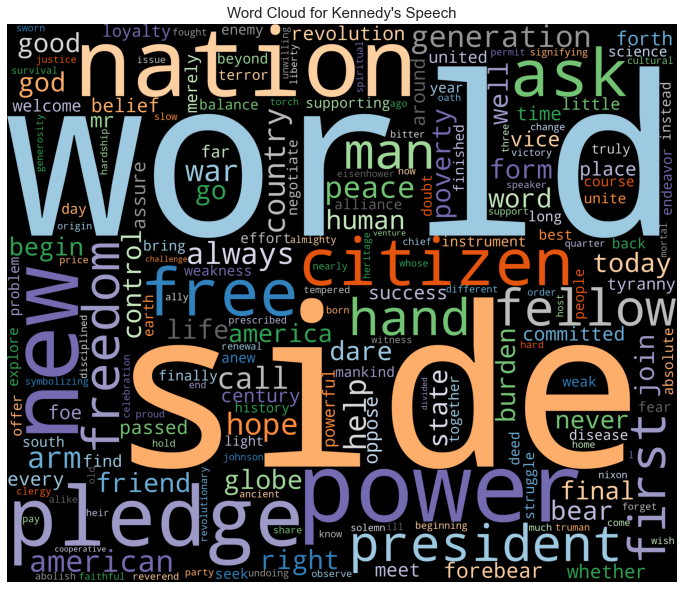

In [359]:
words_kennedy = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500,
                      colormap='tab20c'
                     ).generate(words_kennedy)
plt.figure(figsize=(12, 12))
plt.title("Word Cloud for Kennedy's Speech",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word Cloud for Nixon's Speech

In [360]:
words_nixon = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500,
                      colormap="spring",
                      background_color='white'
                     ).generate(words_nixon)
plt.figure(figsize=(12, 12))
plt.title("Word Cloud for Nixon's Speech",fontsize=15)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()